# Exploring DNN Fits

## Configuration

In [1]:
import sys
sys.path.extend(['..', '../bprime'])
    
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [157]:
import os
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from bprime.learn import LearnedFunction, LearnedB
from bprime.theory import bgs_segment, bgs_rec
from bprime.plots import bhat_plot, loss_plot, loss_limits_plot, rate_loss_plot
from bprime.plots import b_learn_diagnostic_plot, rate_plot, arch_loss_plot, rate_density_plot
from bprime.plots import B_loss_plot, feature_loss_plot, feature_loss_plots
from bprime.nb_utils import load_learnedfuncs_in_dir
#os.environ["CUDA_VISIBLE_DEVICES"]="1,1"

In [187]:
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 300
plt.style.use('./buffalo.mplstyle')

In [140]:
FIT_DIR = '../data/msprime_sims/fits/'

models = os.listdir(FIT_DIR)

res = {m: load_learnedfuncs_in_dir(os.path.join(FIT_DIR, m)) for m in models}

res.keys()

dict_keys(['simple_varL_varrbp', 'segment_best_largesample', 'simple_varL_varlog10rbp', 'simple', 'segment_best_largesample_logL', 'segment_uniform_mu', 'segment', 'segment_best', 'simple_varL', 'segment_largesample'])

Throughout we use a single architecture that has a fair amount of capacity.

In [ ]:
ARCH = (8, 4)

## Simple BGS model

First we look at the simple BGS model, which just includes the total fixed recombination fraction. This is the same as `bgs_rec()` in the `bprime.theory` module.

The model is:

$$B_\mathrm{rec} = \exp\left({\frac{-\mu L}{(t(1+(1-t)r_\mathrm{BP}/t)^2)}}\right)$$

where $t = sh$.

### Variable $\mu$ and $t$

In [ ]:
res['simple'][ARCH][0].func

LearnedFunction with 2 feature(s) and 1 target(s)
 variable feature(s):
  - mu ∈ [-10, -5] (log10, <ufunc 'log10'>)
  - sh ∈ [-4.3, -1.3] (log10, <ufunc 'log10'>)
 fixed fixed(s) (based on metadata):
  - N = 1000
  - rbp = 1e-08
  - L = 1000
Features normalized? True
Features split? True, test size: 30.0% (n=150,000)
Total size: 500,000

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Arial


(<Figure size 1600x800 with 6 Axes>,
 <AxesSubplot:title={'center':'n64 = 0, n32 = 2'}, xlabel='epoch'>)

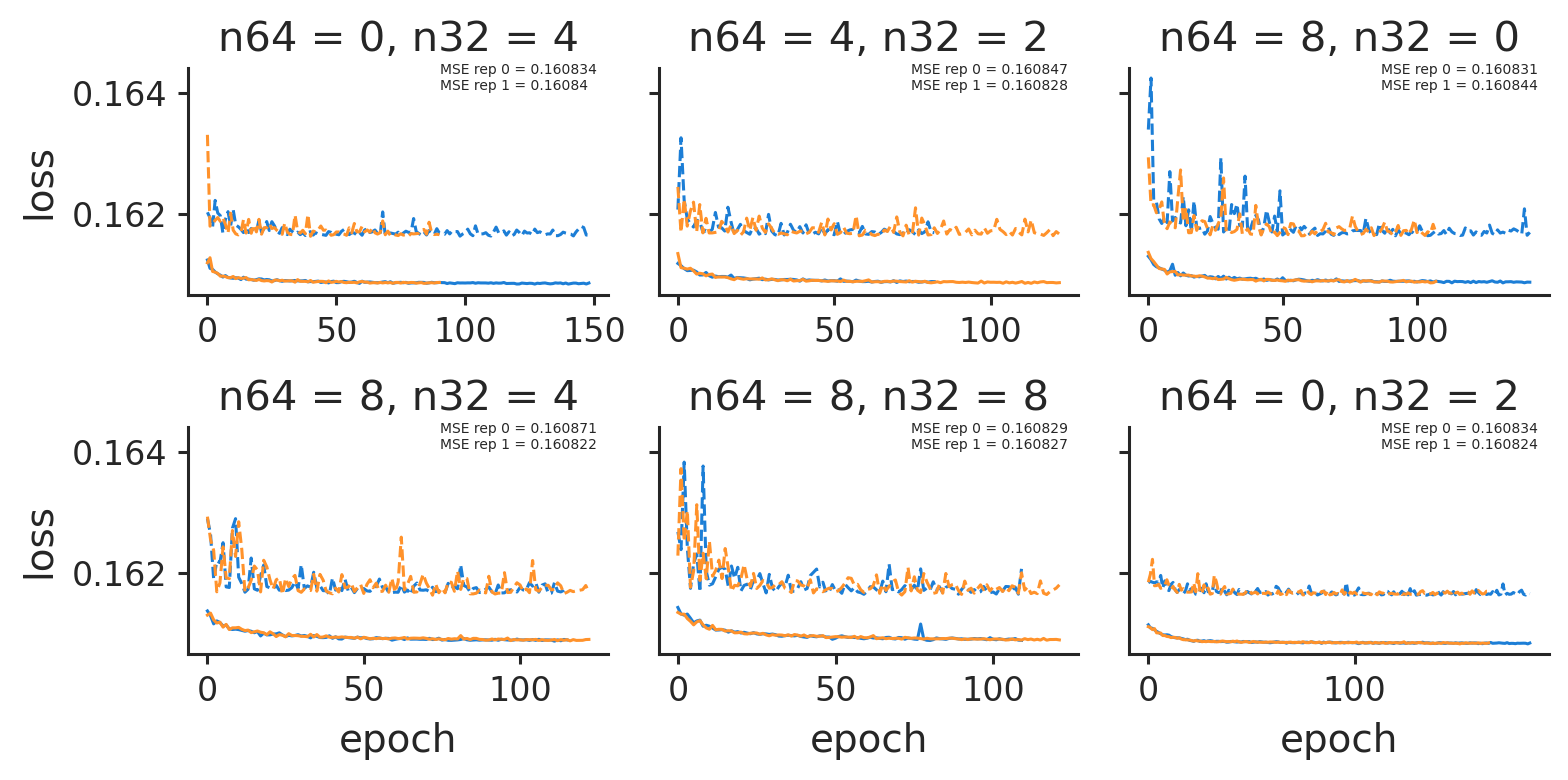

In [7]:
arch_loss_plot(res['simple'])

Really not much of a difference here -- it's fairly insensitive to the architecture for this simple function.

using cached predictions
making 100x100 grid...	done.
313/313 [==============================] - 0s 880us/step
using cached predictions
using cached predictions
using cached predictions


(<Figure size 2000x1400 with 4 Axes>,
 ((<AxesSubplot:xlabel='$\\mu/s$', ylabel='predicted'>,
   <AxesSubplot:xlabel='epoch', ylabel='MSE'>),
  (<AxesSubplot:xlabel='binned $B_\\mathrm{ML}$', ylabel='$\\hat{B}$'>,
   <AxesSubplot:xlabel='predicted', ylabel='validation loss'>)))

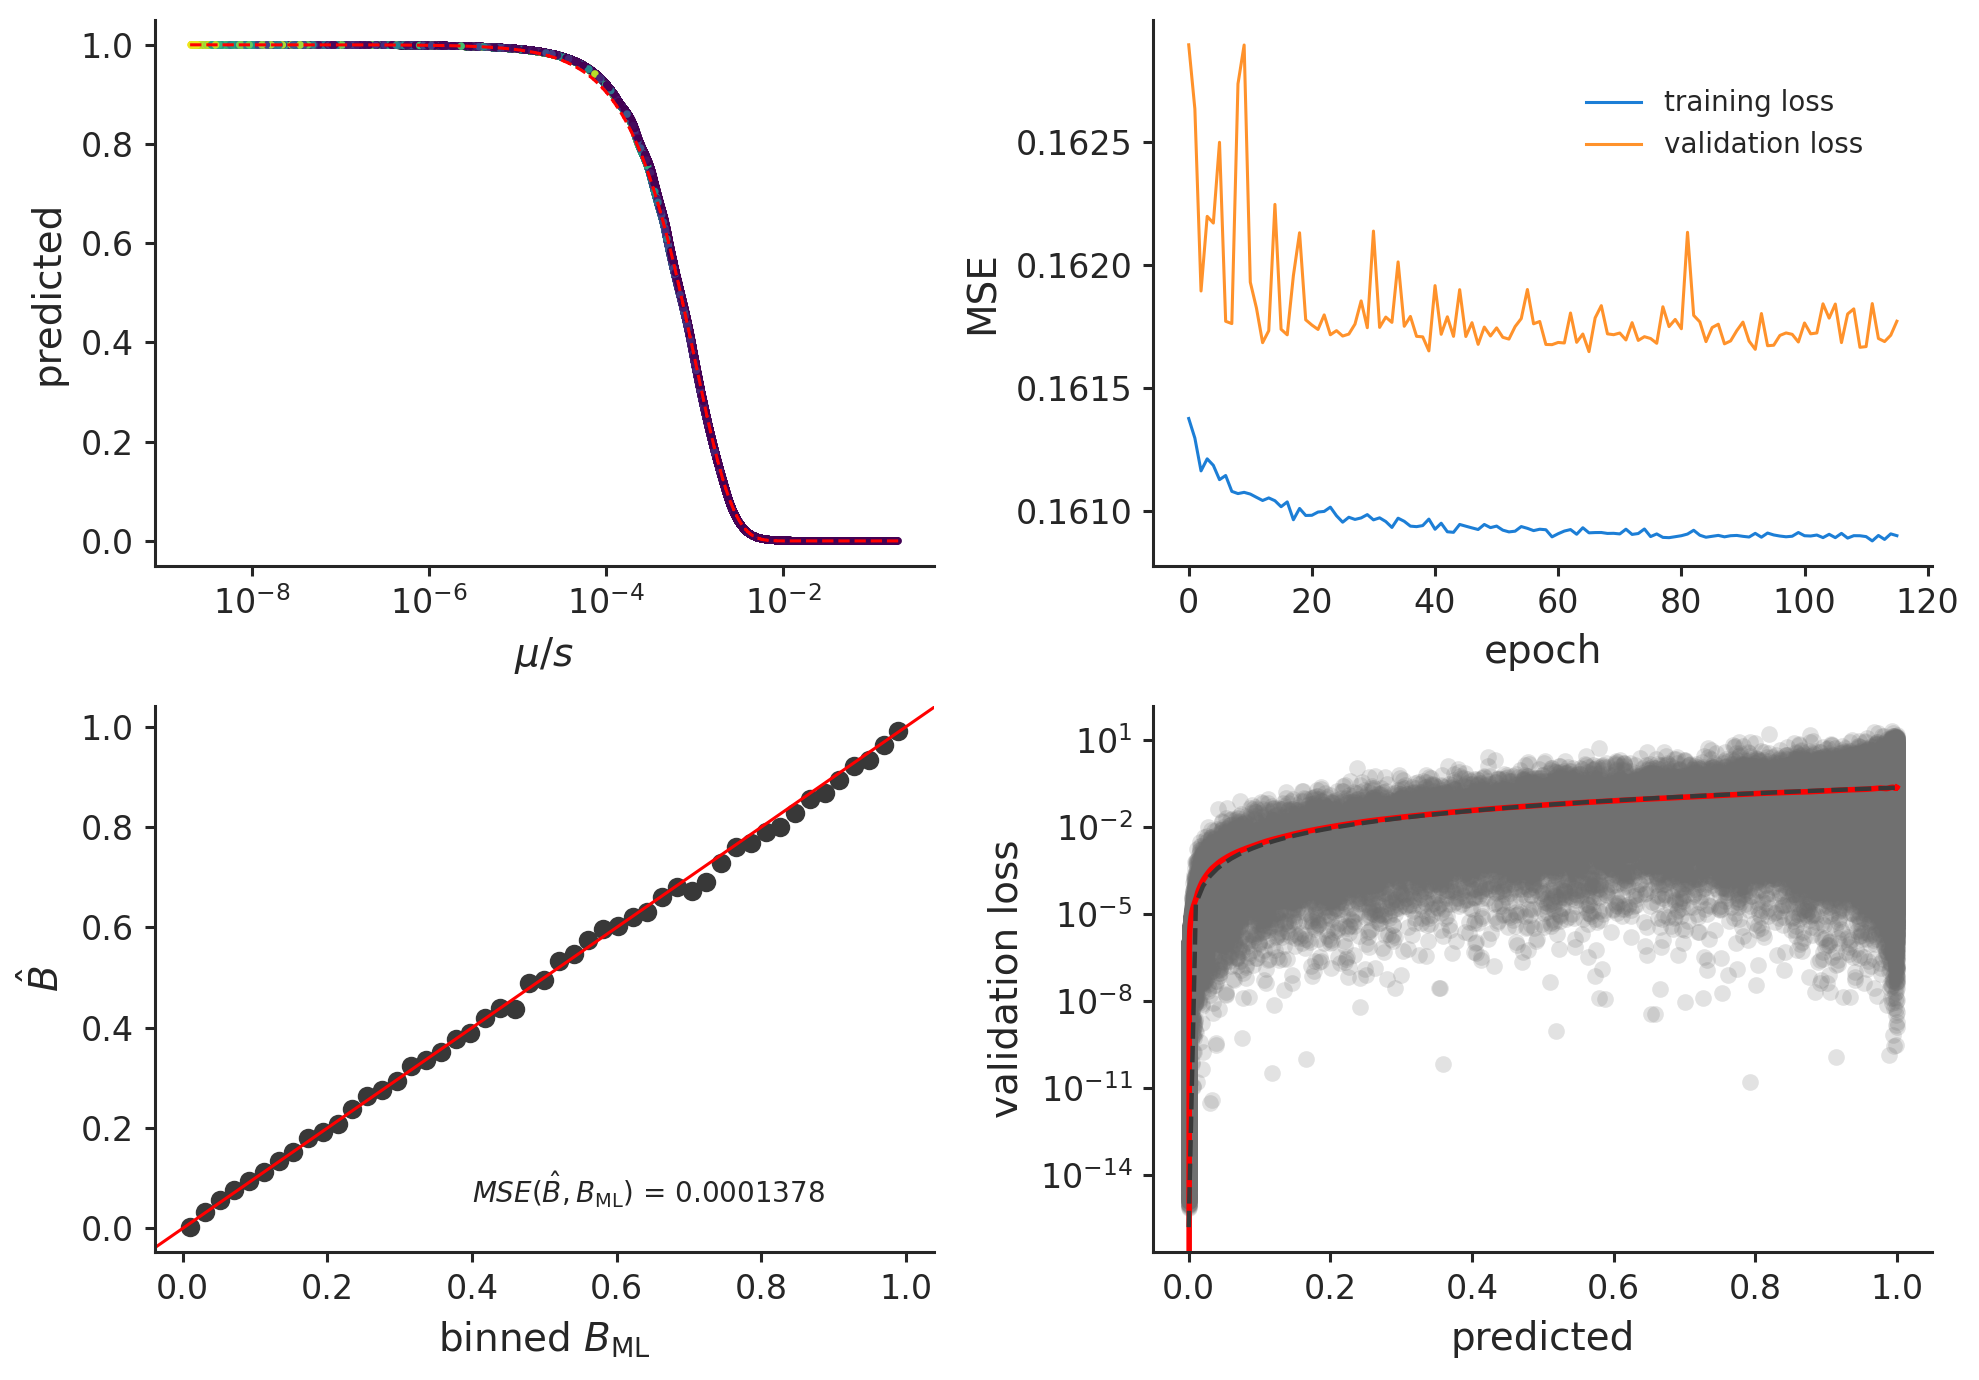

In [34]:
b_learn_diagnostic_plot(res['simple'][ARCH][0], n={'mu': 100, 'sh': 100}, c='sh')

using cached predictions
using cached predictions


(<Figure size 1600x800 with 1 Axes>,
 <AxesSubplot:xlabel='sh', ylabel='binned BIAS between\ntheory/predicted'>)

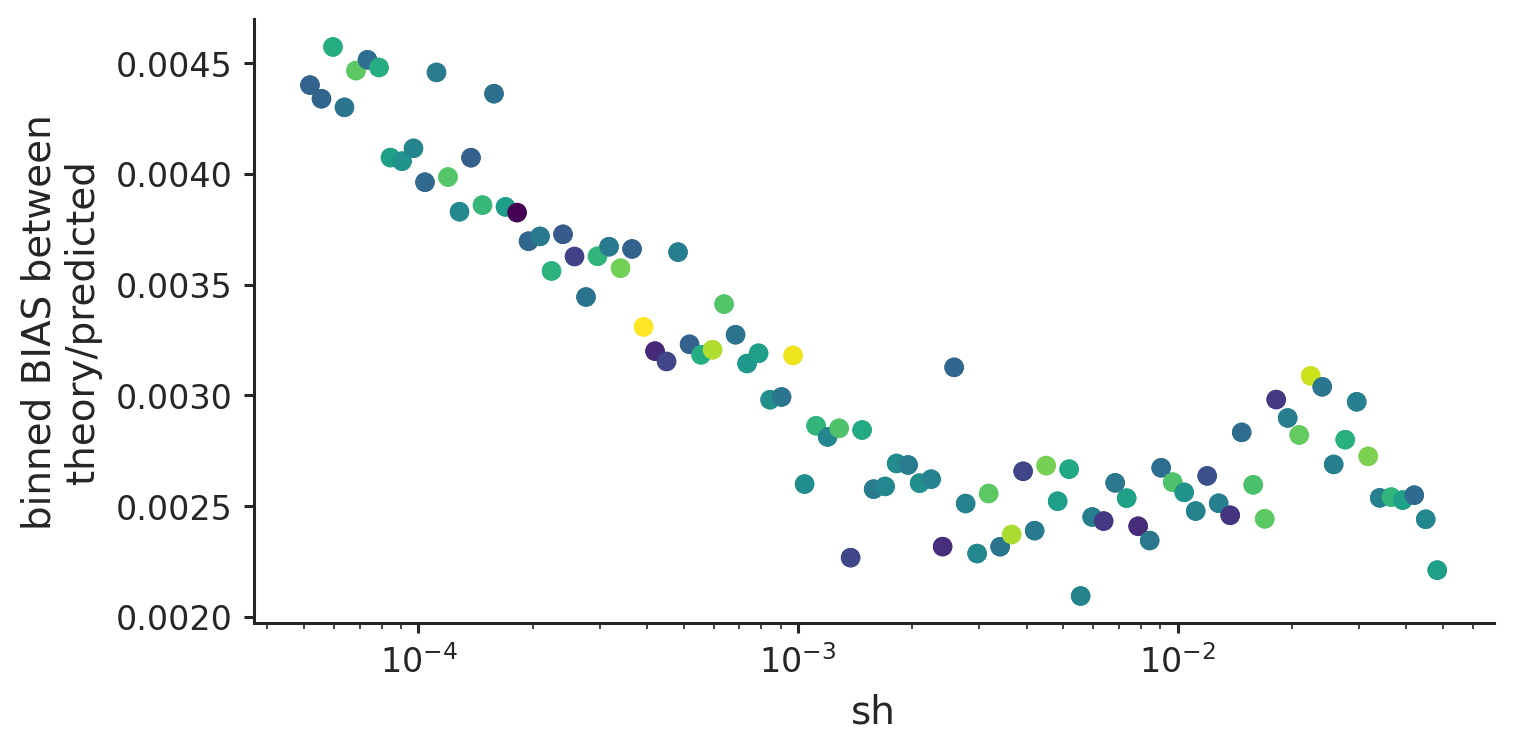

In [139]:
figax = feature_loss_plot(res['simple'][ARCH][0], 'sh', bins=100, loss='bias')
feature_loss_plot(res['simple'][ARCH][0], 'sh', bins=100, loss='bias', figax=figax)

### Variable $\mu$, $t$, and $L$

In [9]:
res['simple_varL'][ARCH][0].func

LearnedFunction with 3 feature(s) and 1 target(s)
 variable feature(s):
  - sh ∈ [-4.3, -1.3] (log10, <ufunc 'log10'>)
  - mu ∈ [-10, -5] (log10, <ufunc 'log10'>)
  - L ∈ [0.0, 1000] (linear, None)
 fixed fixed(s) (based on metadata):
  - N = 1000
  - rbp = 1e-08
Features normalized? True
Features split? True, test size: 30.0% (n=150,000)
Total size: 500,000

(<Figure size 1600x800 with 6 Axes>,
 <AxesSubplot:title={'center':'n64 = 8, n32 = 4'}, xlabel='epoch'>)

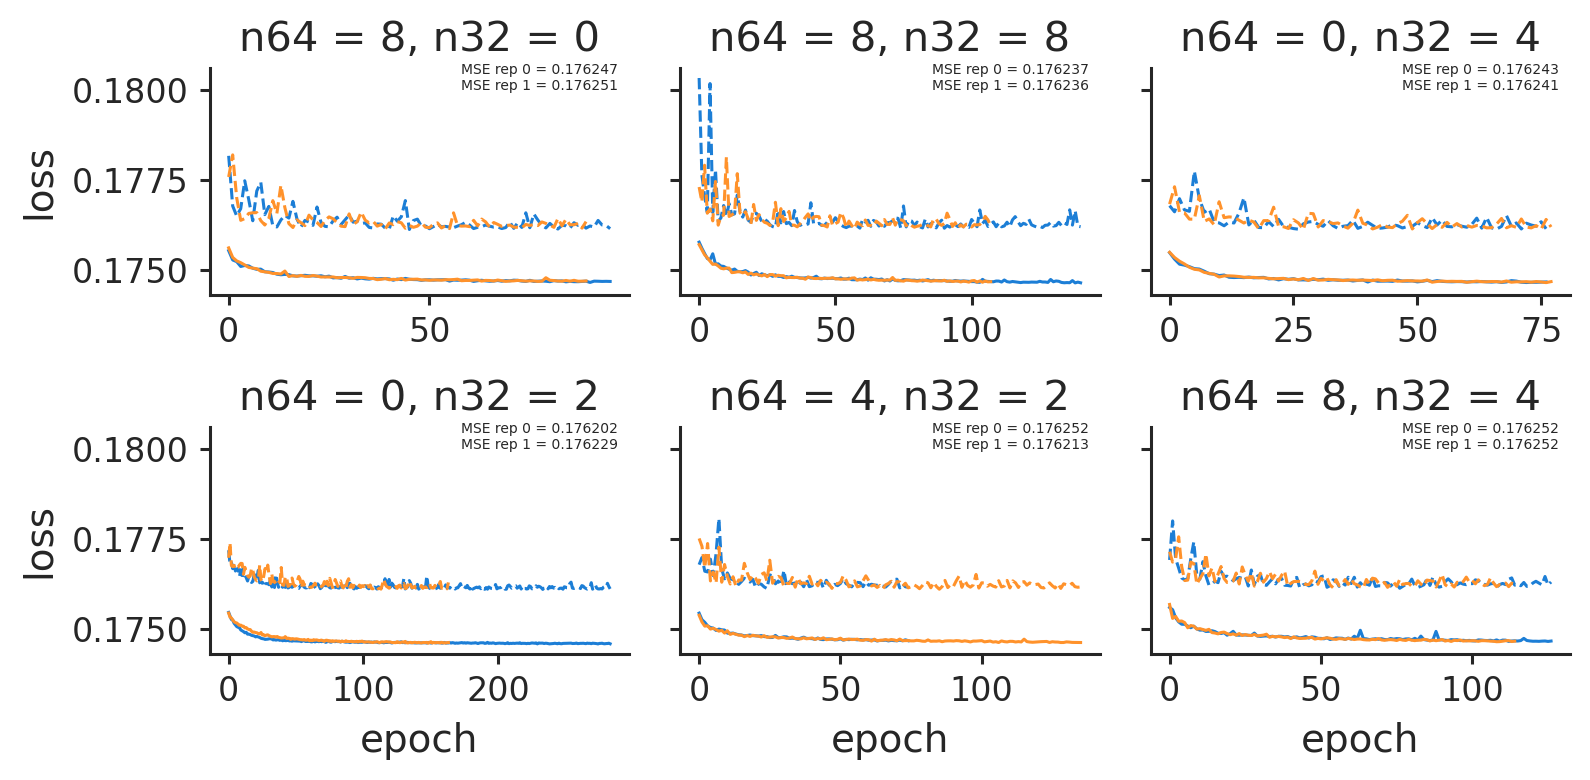

In [10]:
arch_loss_plot(res['simple_varL'])

using cached predictions
using cached predictions
using cached predictions


(<Figure size 2000x1400 with 4 Axes>,
 ((<AxesSubplot:xlabel='$\\mu/s$', ylabel='predicted'>,
   <AxesSubplot:xlabel='epoch', ylabel='MSE'>),
  (<AxesSubplot:xlabel='binned $B_\\mathrm{ML}$', ylabel='$\\hat{B}$'>,
   <AxesSubplot:xlabel='predicted', ylabel='validation loss'>)))

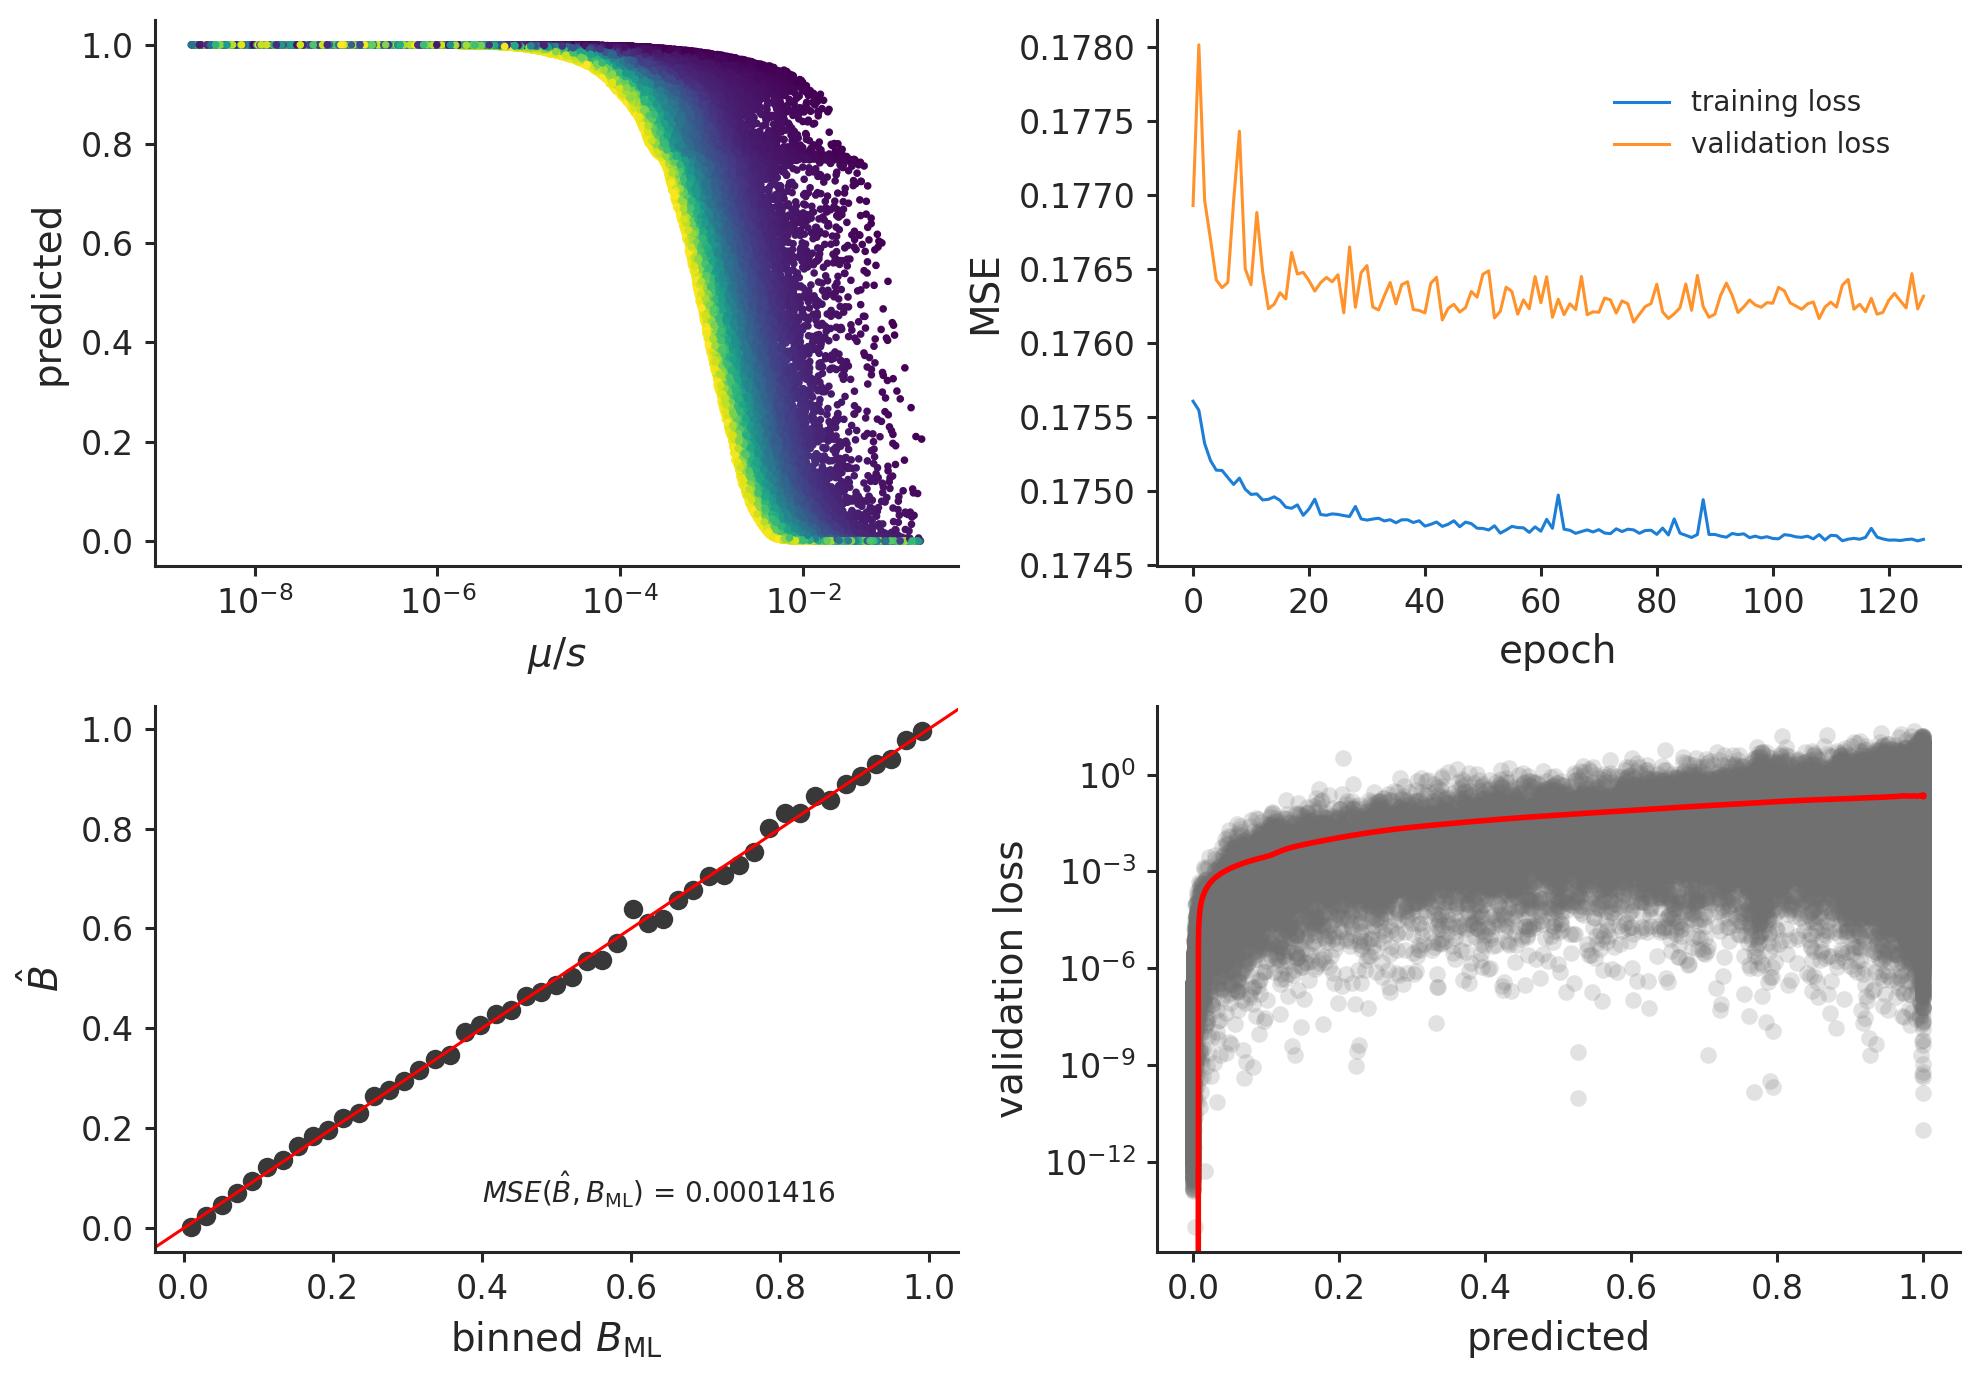

In [11]:
b_learn_diagnostic_plot(res['simple_varL'][ARCH][0], n={'mu': 10, 'sh': 10, 'L':10, 'rbp':10}, c='L', add_theory=False)

### Variable $\mu$, $t$, $L$, and $r_\mathrm{BP}$

Notably, $r_\mathrm{BP}$ is on a linear scale here. 

In [12]:
res['simple_varL_varrbp'][ARCH][0].func

LearnedFunction with 4 feature(s) and 1 target(s)
 variable feature(s):
  - L ∈ [0.0, 1000] (linear, None)
  - rbp ∈ [1e-10, 1e-07] (linear, None)
  - mu ∈ [-10, -5] (log10, <ufunc 'log10'>)
  - sh ∈ [-4.3, -1.3] (log10, <ufunc 'log10'>)
 fixed fixed(s) (based on metadata):
  - N = 1000
Features normalized? True
Features split? True, test size: 30.0% (n=150,000)
Total size: 500,000

(<Figure size 1600x800 with 6 Axes>,
 <AxesSubplot:title={'center':'n64 = 8, n32 = 8'}, xlabel='epoch'>)

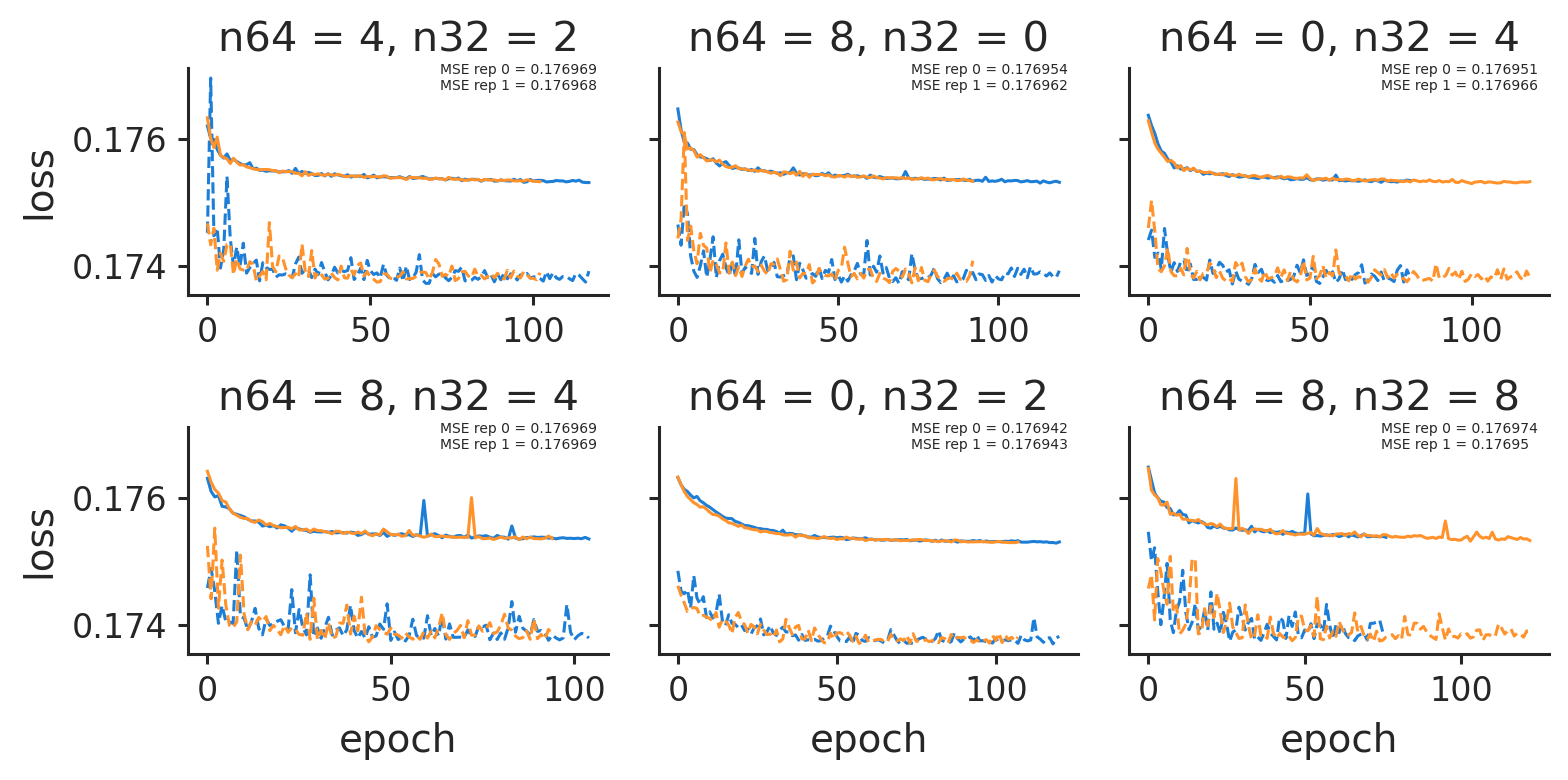

In [13]:
arch_loss_plot(res['simple_varL_varrbp'])

using cached predictions
using cached predictions
using cached predictions


(<Figure size 2000x1400 with 4 Axes>,
 ((<AxesSubplot:xlabel='$\\mu/s$', ylabel='predicted'>,
   <AxesSubplot:xlabel='epoch', ylabel='MSE'>),
  (<AxesSubplot:xlabel='binned $B_\\mathrm{ML}$', ylabel='$\\hat{B}$'>,
   <AxesSubplot:xlabel='predicted', ylabel='validation loss'>)))

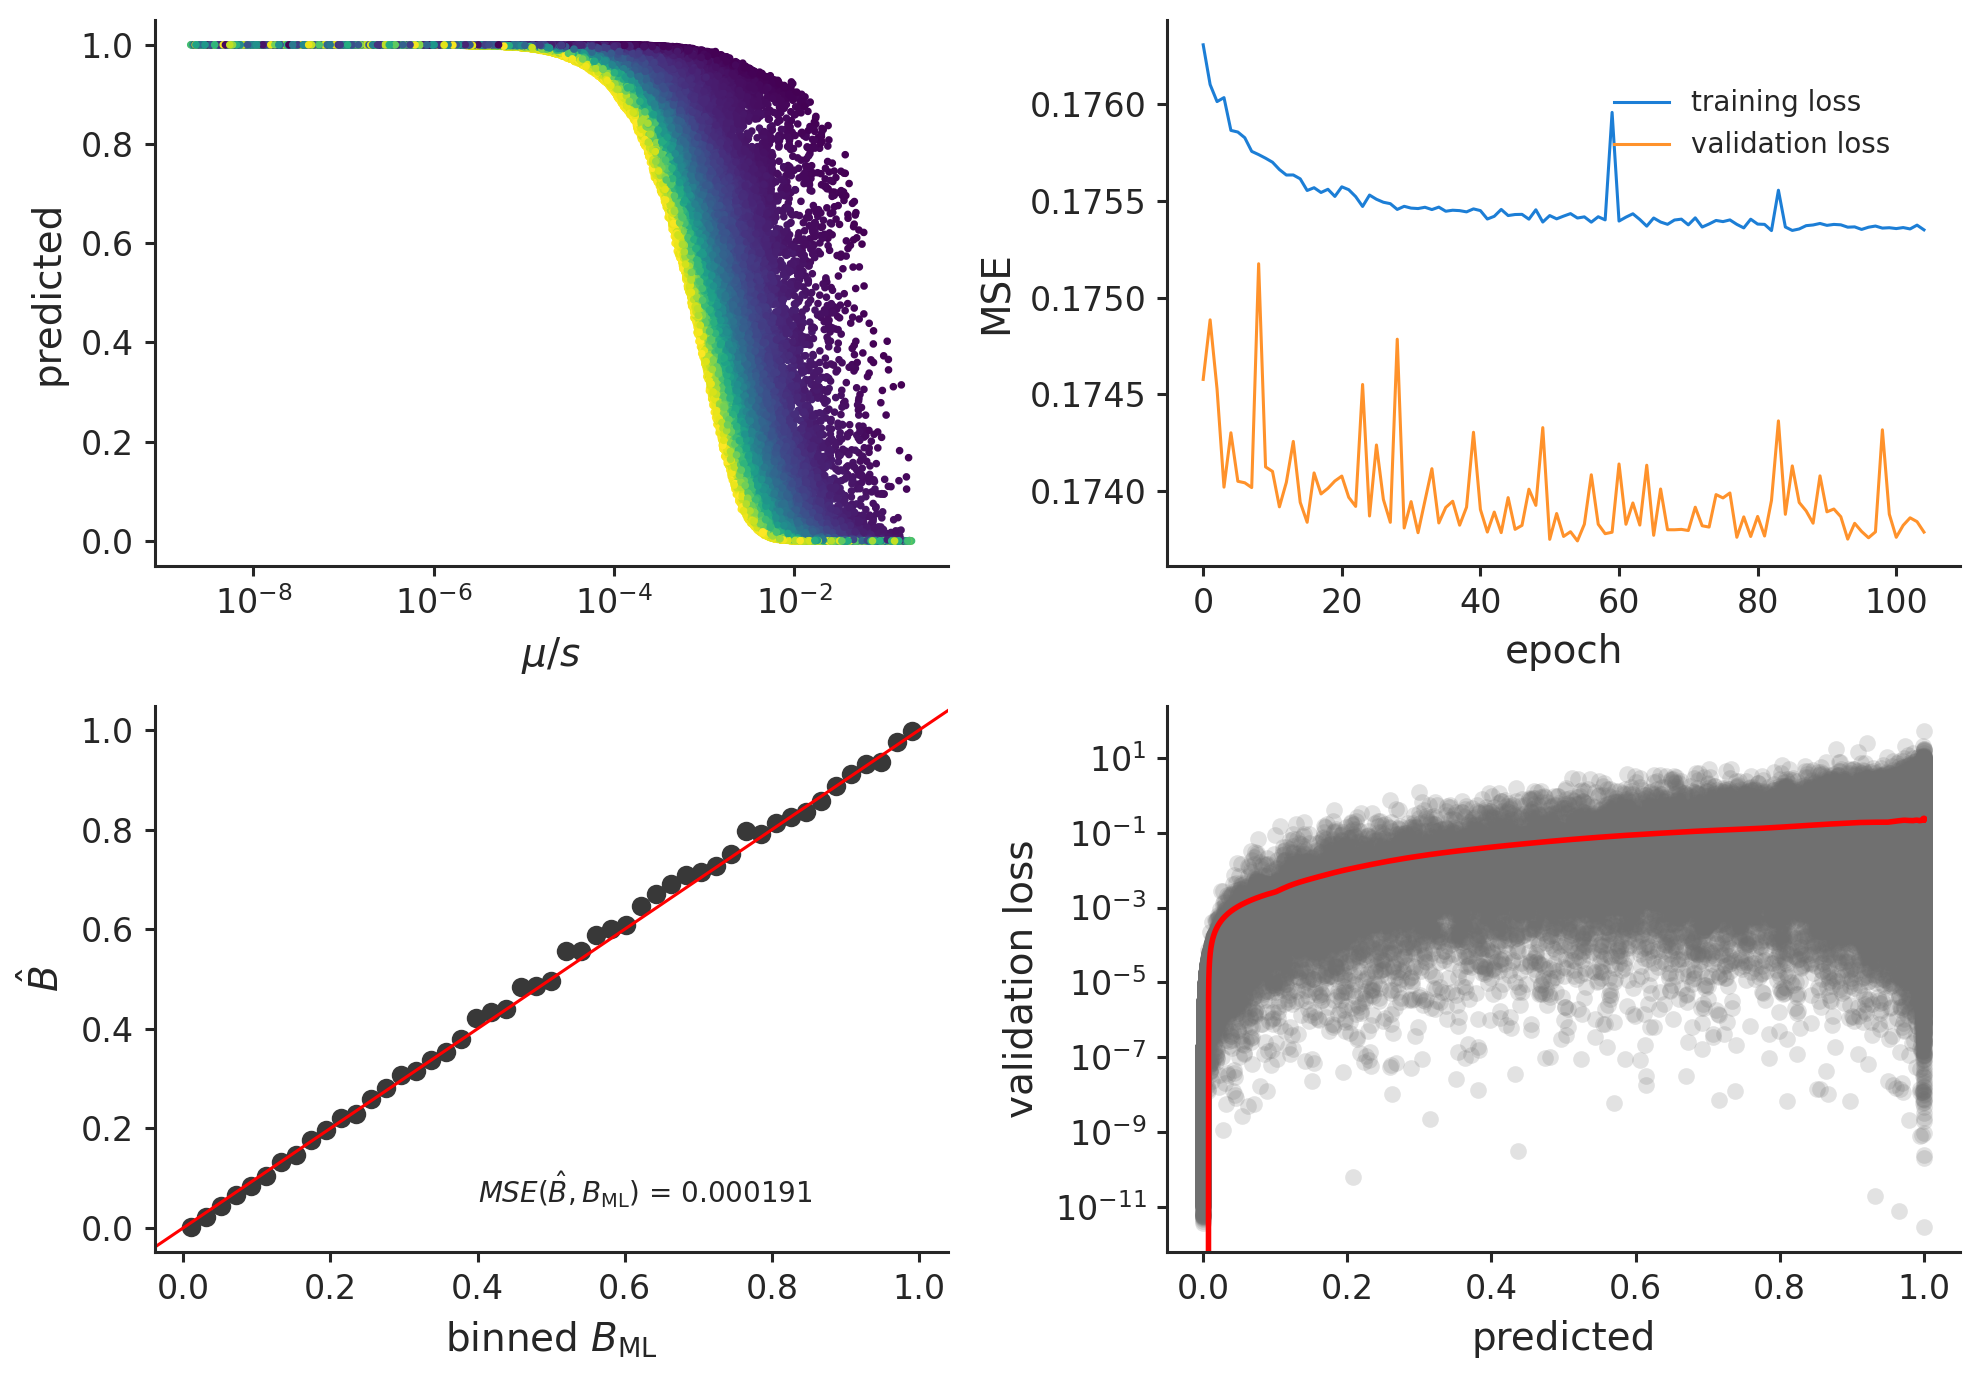

In [14]:
b_learn_diagnostic_plot(res['simple_varL_varrbp'][ARCH][0], n={'mu': 10, 'sh': 10, 'L':10, 'rbp':10, 'rf': 10}, c='L', add_theory=False)

## Segment BGS Model

$$B_\mathrm{seg} = \exp\left(\int_0^L \frac{dl}{t(1+(1-t)(c + r_\text{BP}l)/t)^2}\right) = \exp\left(\frac{r_\text{BP} L t}{(c  (1-t)+t) ((1-t) r_\text{BP} L +t + c (1 - t))} \right)$$

where $c$ is the recombination fraction between the focal neutral site and the start of the segment with length $L$.

### With $t$, $\mu$, and $L$ on a Linear Scale

In [15]:
res['segment_uniform_mu'][ARCH][0].func

LearnedFunction with 5 feature(s) and 1 target(s)
 variable feature(s):
  - mu ∈ [1e-10, 1e-05] (linear, None)
  - rf ∈ [-10, -0.301] (log10, <ufunc 'log10'>)
  - L ∈ [0.0, 1100] (linear, None)
  - rbp ∈ [-10, -6] (log10, <ufunc 'log10'>)
  - sh ∈ [5e-06, 0.05] (linear, None)
 fixed fixed(s) (based on metadata):
  - N = 1000
Features normalized? True
Features split? True, test size: 30.0% (n=150,000)
Total size: 500,000

(<Figure size 1600x800 with 6 Axes>,
 <AxesSubplot:title={'center':'n64 = 8, n32 = 0'}, xlabel='epoch'>)

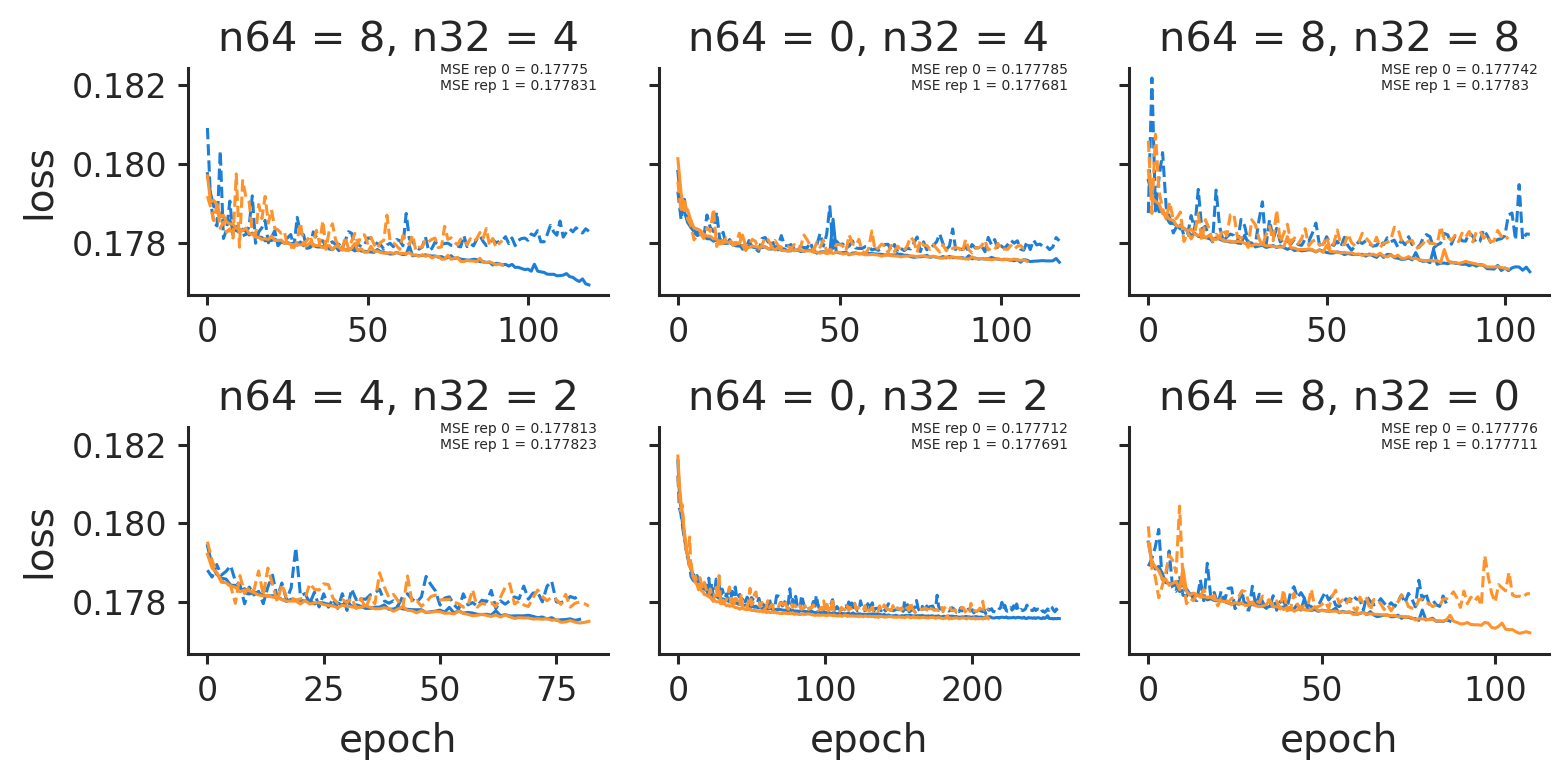

In [16]:
arch_loss_plot(res['segment_uniform_mu'])

Note the difference in the learning histories from earlier simulations. When we look at the predicted values over rate, we see some outliers —failed predictions— caused by using a linear scale for some features:

using cached predictions
using cached predictions
using cached predictions


(<Figure size 2000x1400 with 4 Axes>,
 ((<AxesSubplot:xlabel='$\\mu/s$', ylabel='predicted'>,
   <AxesSubplot:xlabel='epoch', ylabel='MSE'>),
  (<AxesSubplot:xlabel='binned $B_\\mathrm{ML}$', ylabel='$\\hat{B}$'>,
   <AxesSubplot:xlabel='predicted', ylabel='validation loss'>)))

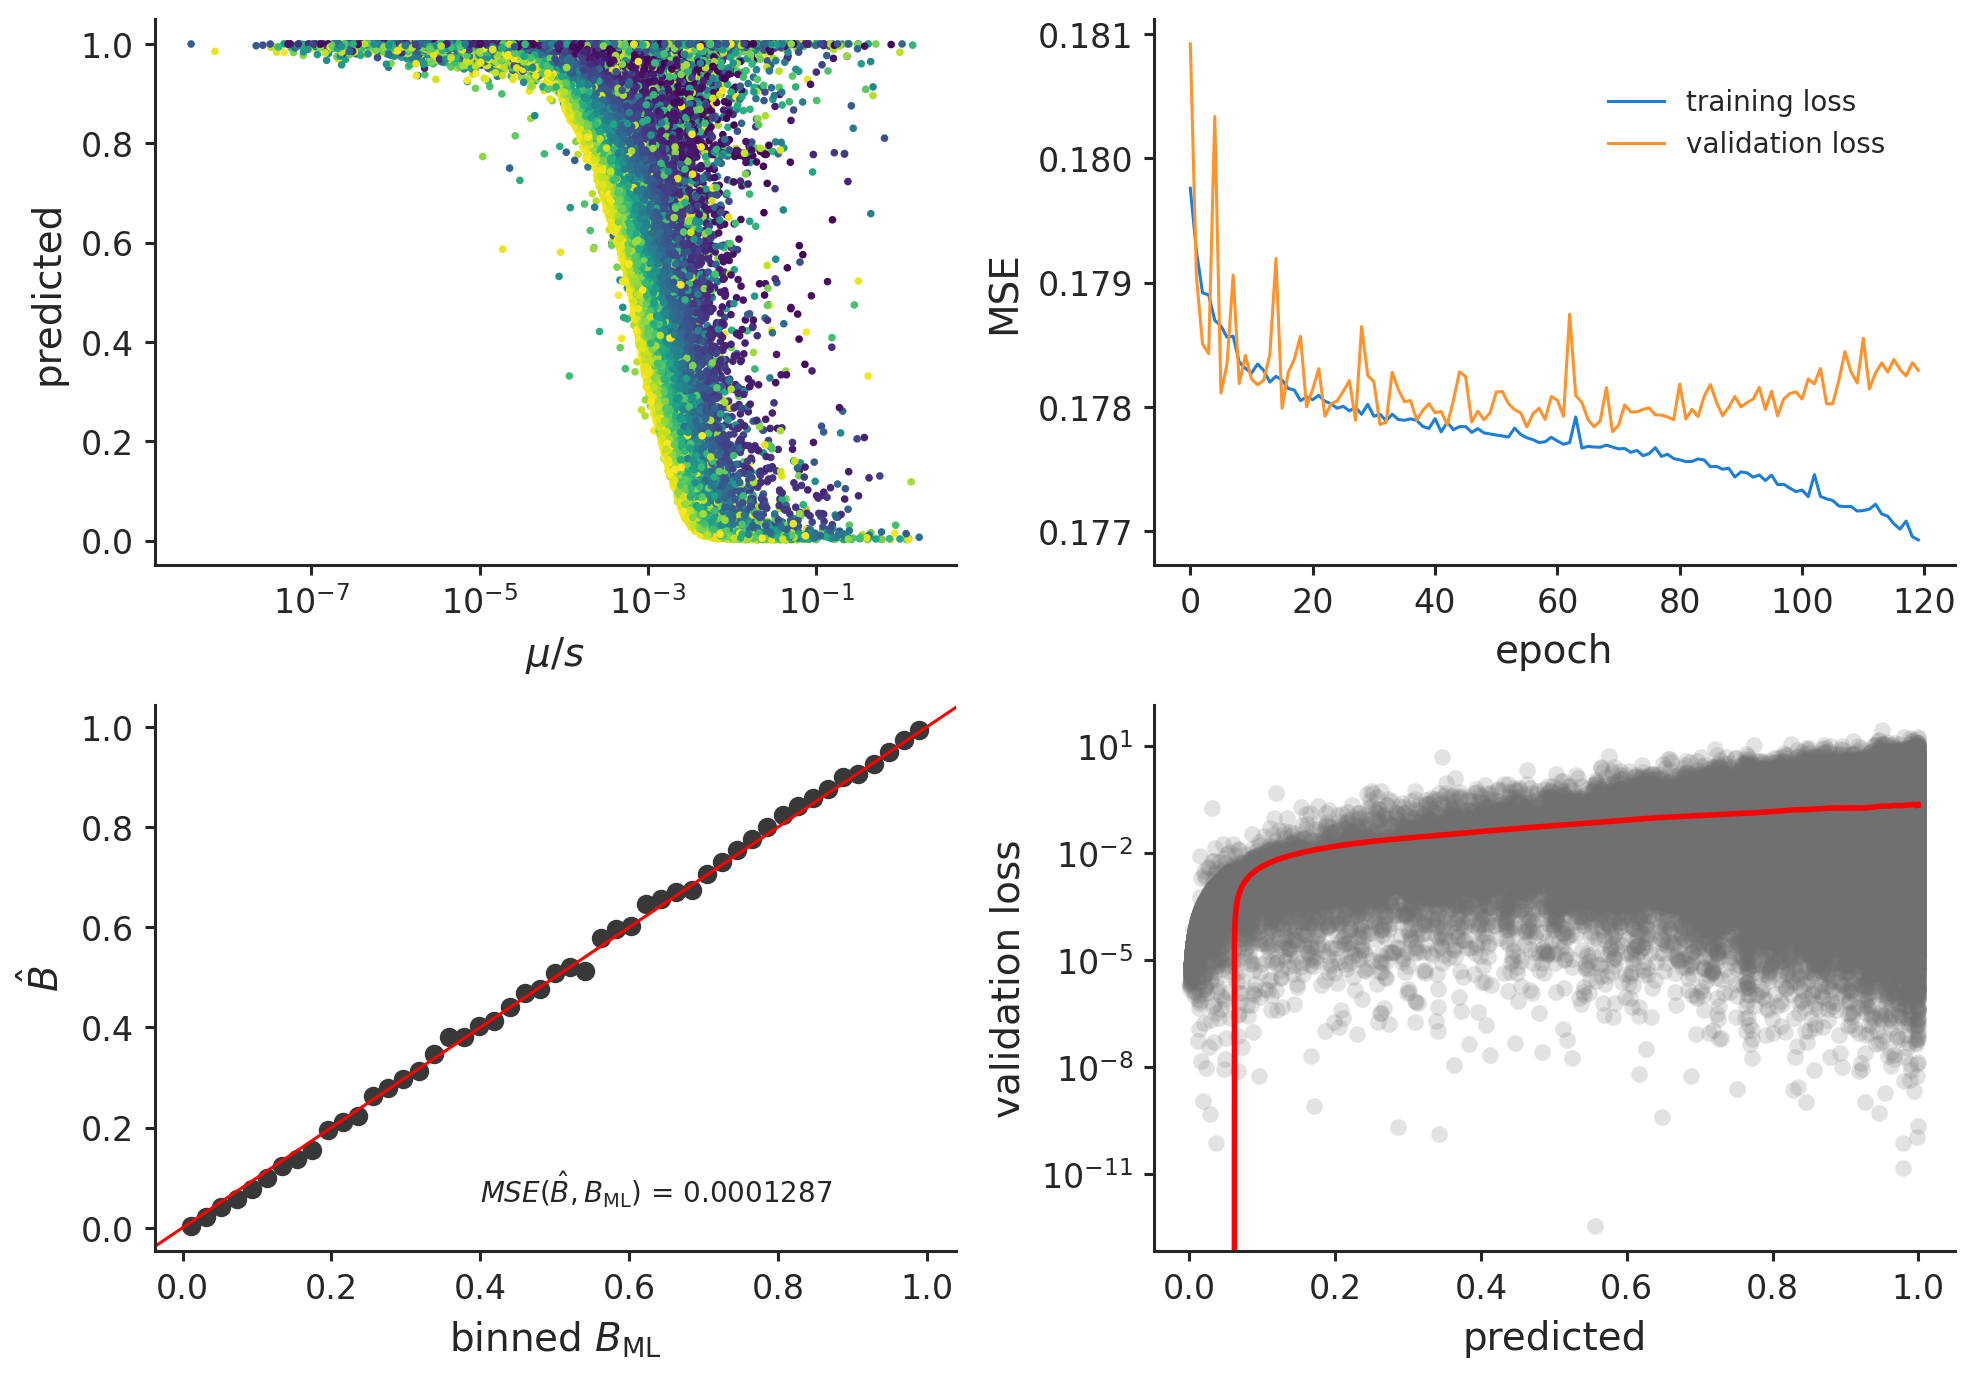

In [17]:
b_learn_diagnostic_plot(res['segment_uniform_mu'][ARCH][0], n={'mu': 10, 'sh': 10, 'L':10, 'rbp':10, 'rf': 10}, c='L', add_theory=False)

### With $\mu$ and $L$ on a Linear Scale

In [18]:
res['segment'][ARCH][0].func

LearnedFunction with 5 feature(s) and 1 target(s)
 variable feature(s):
  - rbp ∈ [-10, -6] (log10, <ufunc 'log10'>)
  - mu ∈ [1e-10, 1e-05] (linear, None)
  - L ∈ [0.0, 1100] (linear, None)
  - sh ∈ [-5.3, -1.3] (log10, <ufunc 'log10'>)
  - rf ∈ [-10, -0.301] (log10, <ufunc 'log10'>)
 fixed fixed(s) (based on metadata):
  - N = 1000
Features normalized? True
Features split? True, test size: 30.0% (n=150,000)
Total size: 500,000

(<Figure size 1600x800 with 6 Axes>,
 <AxesSubplot:title={'center':'n64 = 0, n32 = 4'}, xlabel='epoch'>)

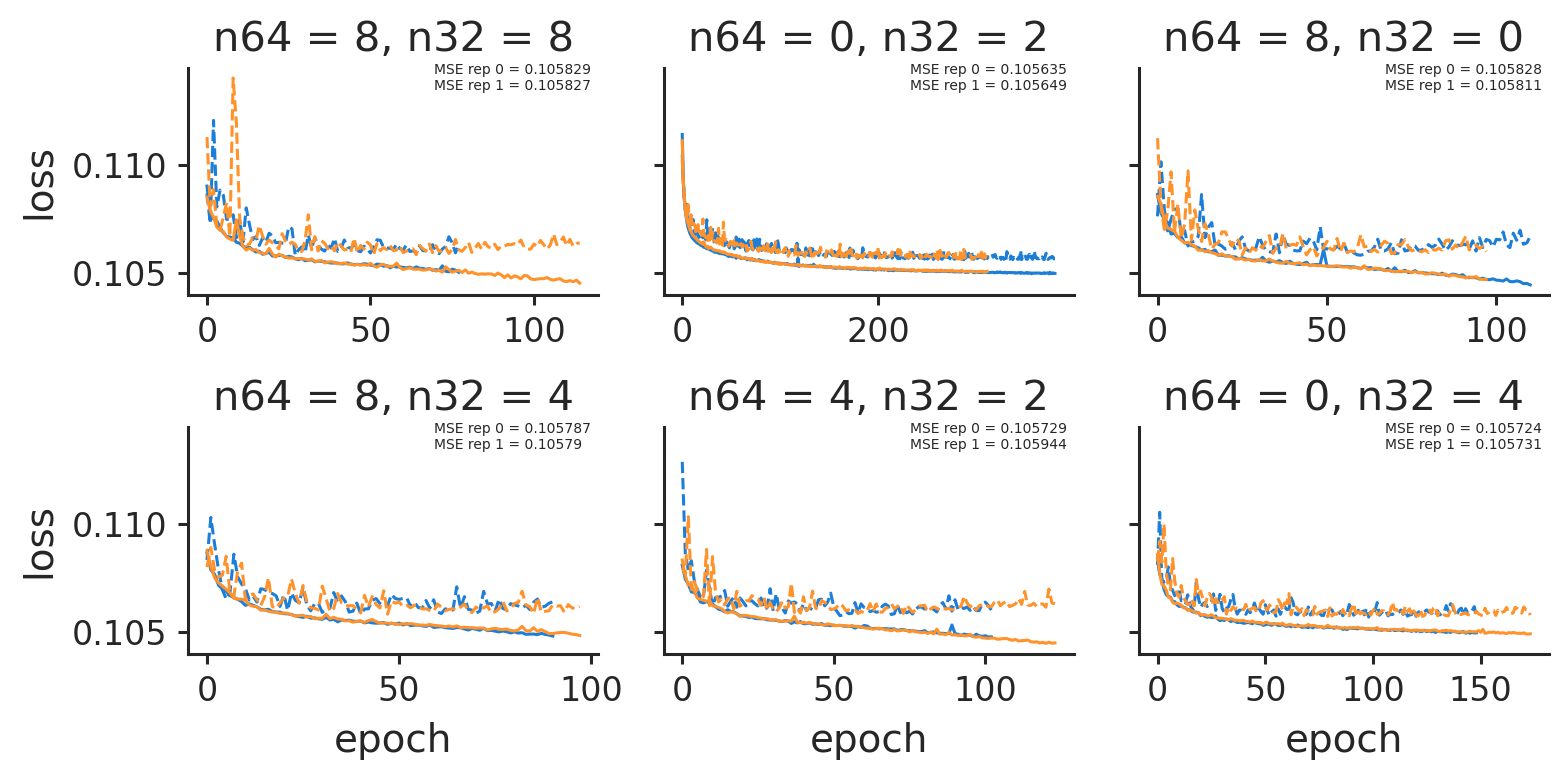

In [19]:
arch_loss_plot(res['segment'])

using cached predictions
using cached predictions
using cached predictions


(<Figure size 2000x1400 with 4 Axes>,
 ((<AxesSubplot:xlabel='$\\mu/s$', ylabel='predicted'>,
   <AxesSubplot:xlabel='epoch', ylabel='MSE'>),
  (<AxesSubplot:xlabel='binned $B_\\mathrm{ML}$', ylabel='$\\hat{B}$'>,
   <AxesSubplot:xlabel='predicted', ylabel='validation loss'>)))

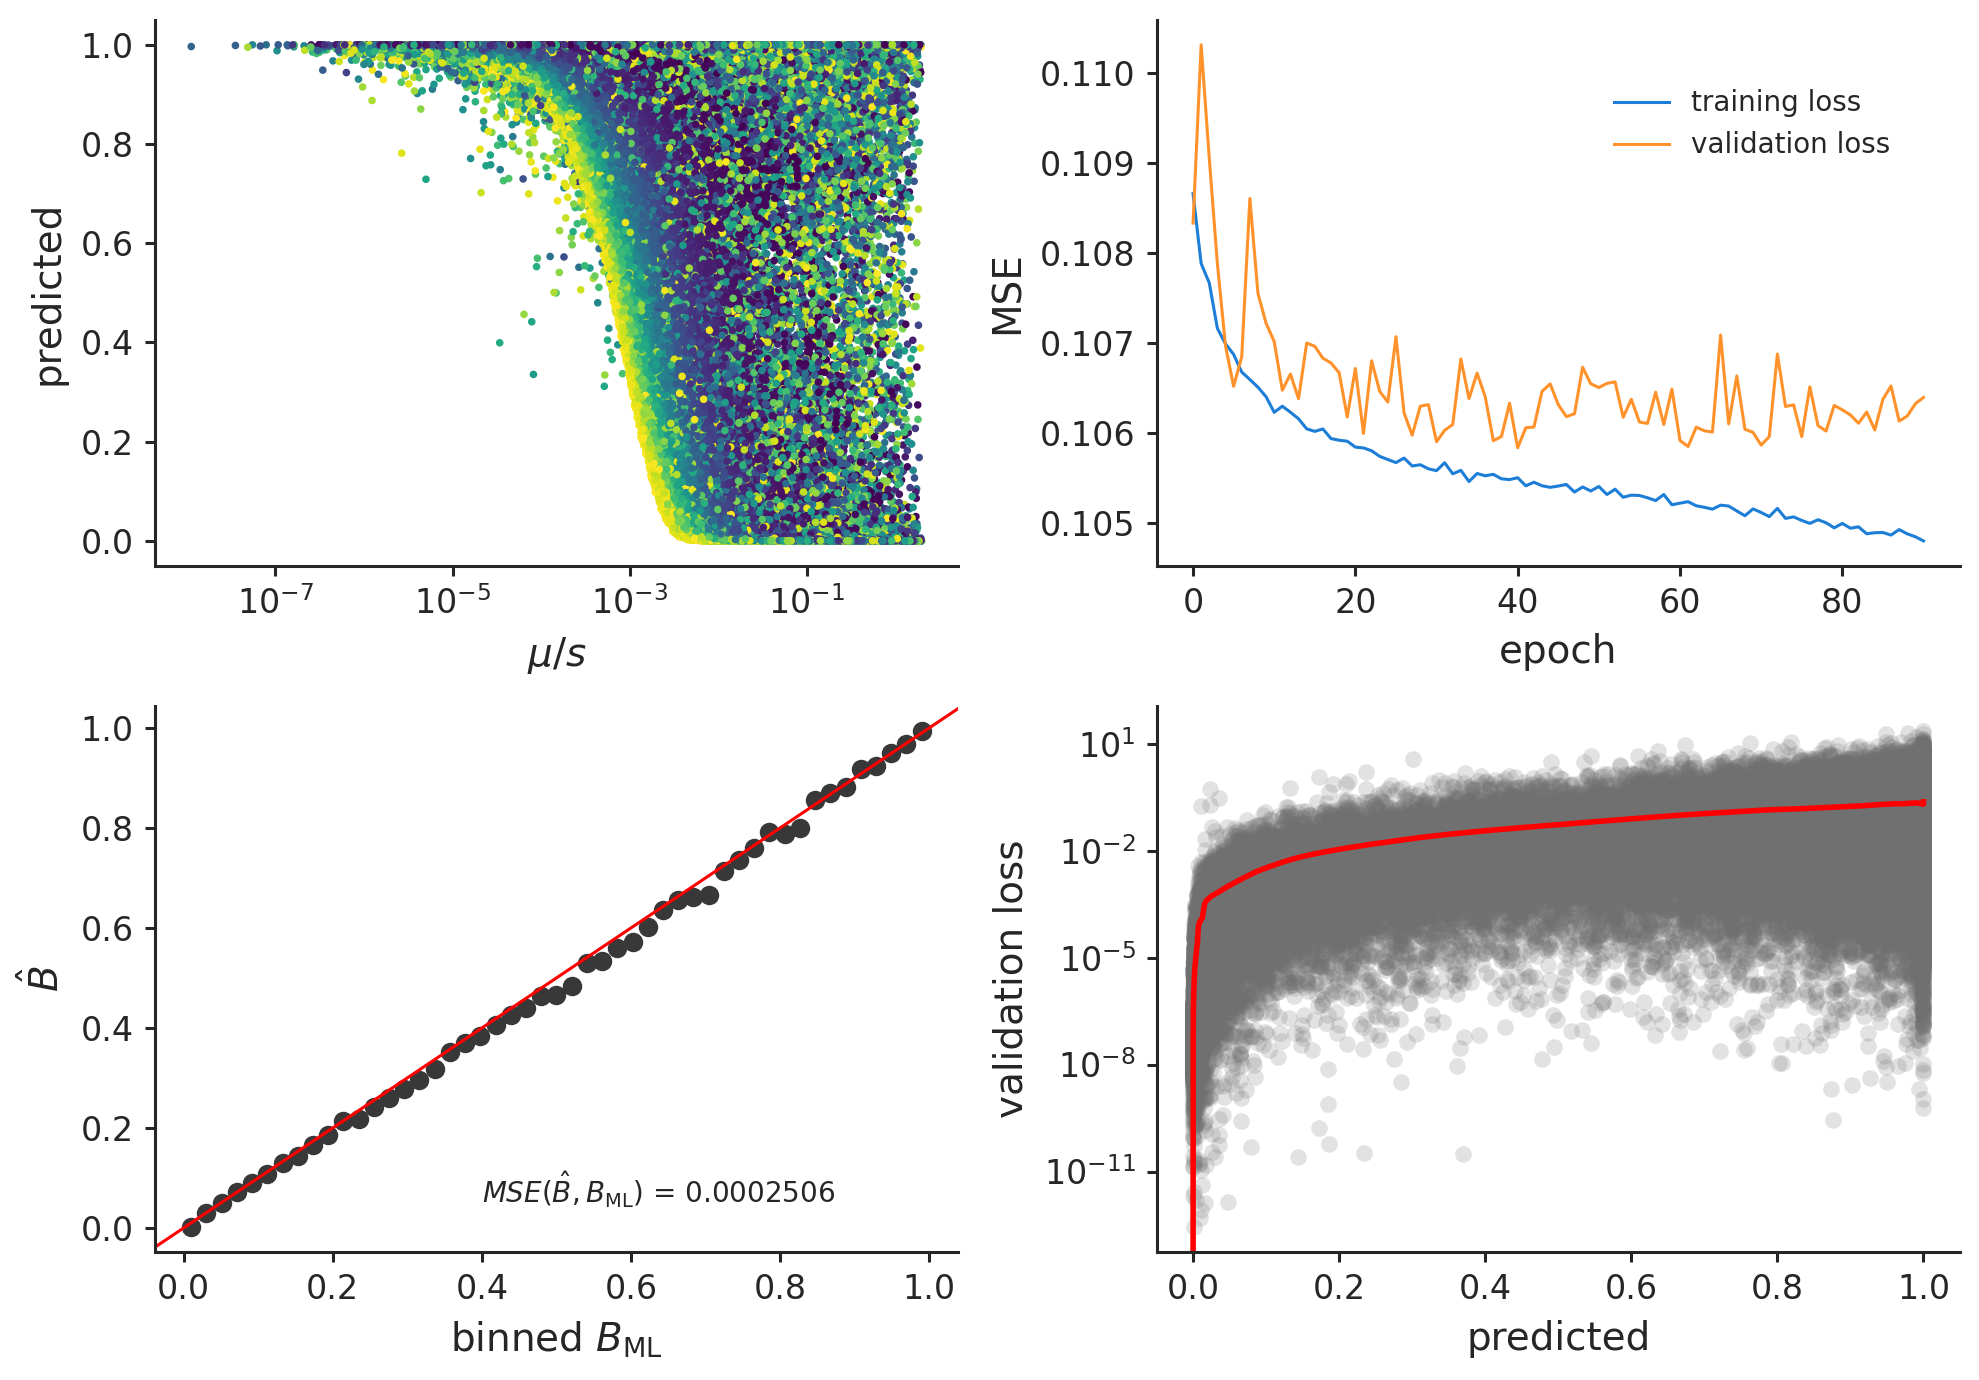

In [20]:
b_learn_diagnostic_plot(res['segment'][ARCH][0], n={'mu': 10, 'sh': 10, 'L':10, 'rbp':10, 'rf': 10}, c='L', add_theory=False)

(<Figure size 1600x800 with 2 Axes>,
 array([<AxesSubplot:xlabel='$\\mu/s$', ylabel='density'>,
        <AxesSubplot:xlabel='$B_\\mathrm{theory}$', ylabel='density'>],
       dtype=object))

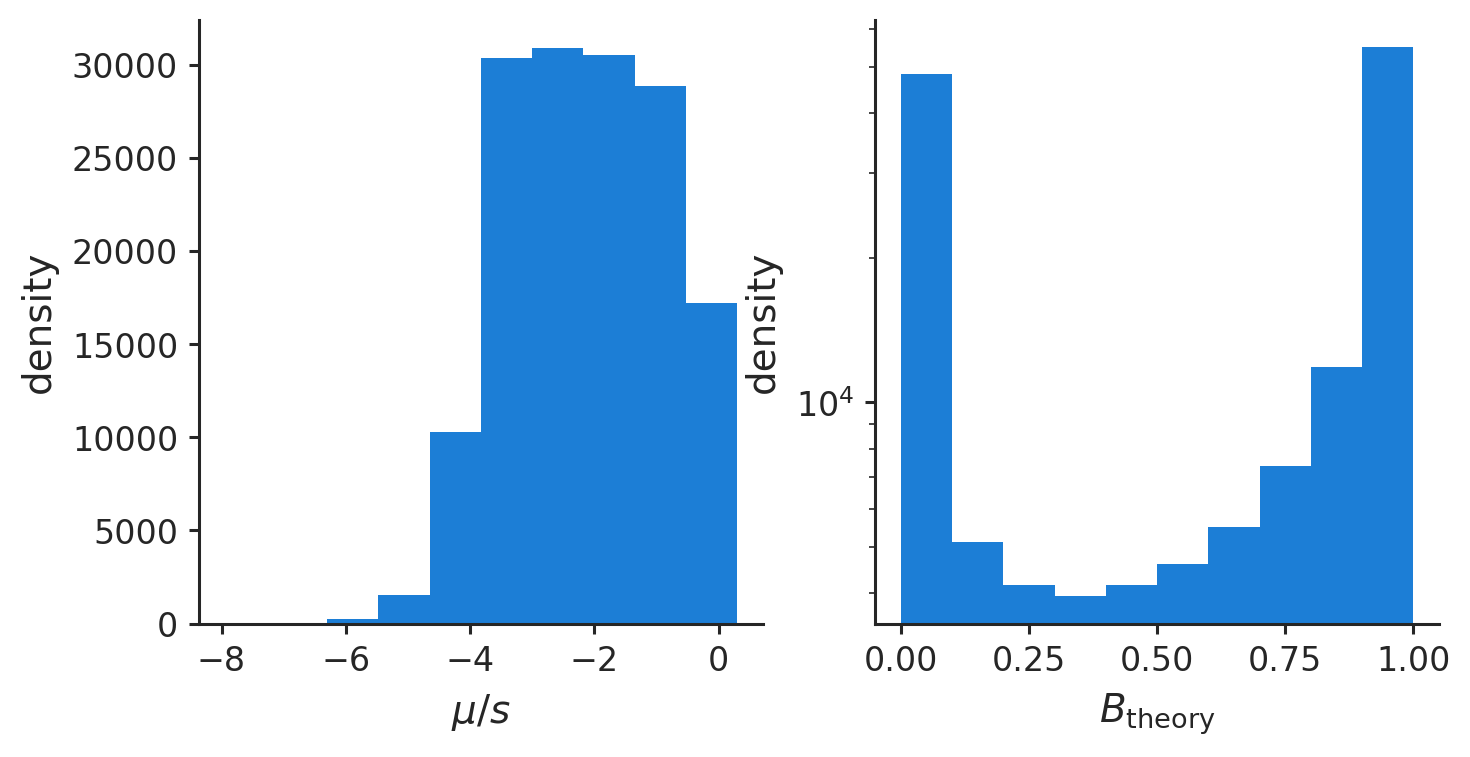

In [21]:
rate_density_plot(res['segment'][ARCH][0])

### Best Segment Parameter Space - $\mu$ and $t$ on log scales

In [22]:
res['segment_best'][ARCH][0].func

LearnedFunction with 5 feature(s) and 1 target(s)
 variable feature(s):
  - L ∈ [0.0, 1100] (linear, None)
  - rf ∈ [-10, -0.301] (log10, <ufunc 'log10'>)
  - rbp ∈ [-10, -6] (log10, <ufunc 'log10'>)
  - mu ∈ [-10, -5] (log10, <ufunc 'log10'>)
  - sh ∈ [-5.3, -1.3] (log10, <ufunc 'log10'>)
 fixed fixed(s) (based on metadata):
  - N = 1000
Features normalized? True
Features split? True, test size: 30.0% (n=150,000)
Total size: 500,000

(<Figure size 1600x800 with 6 Axes>,
 <AxesSubplot:title={'center':'n64 = 8, n32 = 8'}, xlabel='epoch'>)

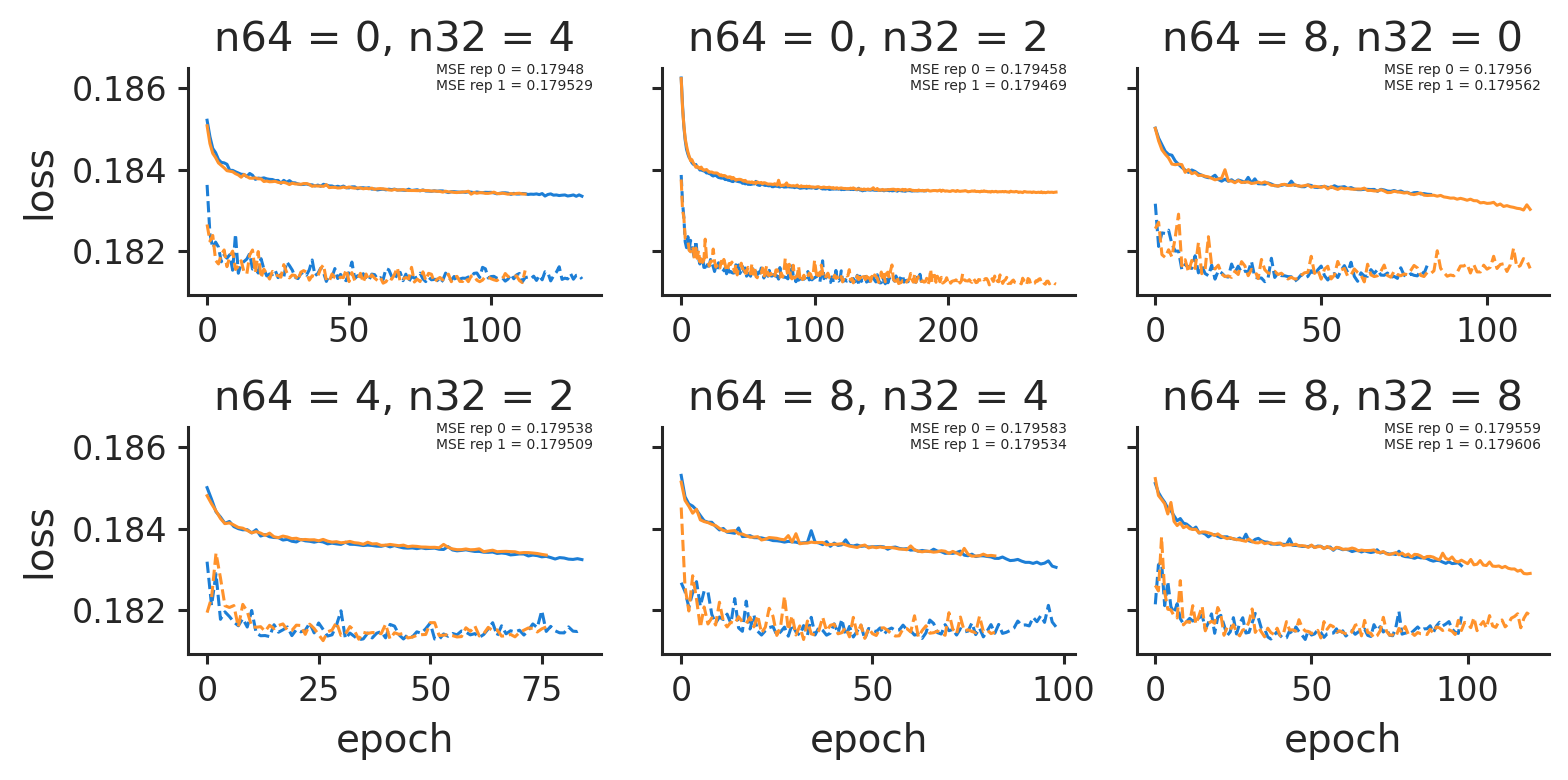

In [23]:
arch_loss_plot(res['segment_best'])

using cached predictions
using cached predictions
using cached predictions


/home/vsb/miniconda3/envs/bprime/lib/python3.8/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


(<Figure size 2000x1400 with 4 Axes>,
 ((<AxesSubplot:xlabel='$\\mu/s$', ylabel='predicted'>,
   <AxesSubplot:xlabel='epoch', ylabel='MSE'>),
  (<AxesSubplot:xlabel='binned $B_\\mathrm{ML}$', ylabel='$\\hat{B}$'>,
   <AxesSubplot:xlabel='predicted', ylabel='validation loss'>)))

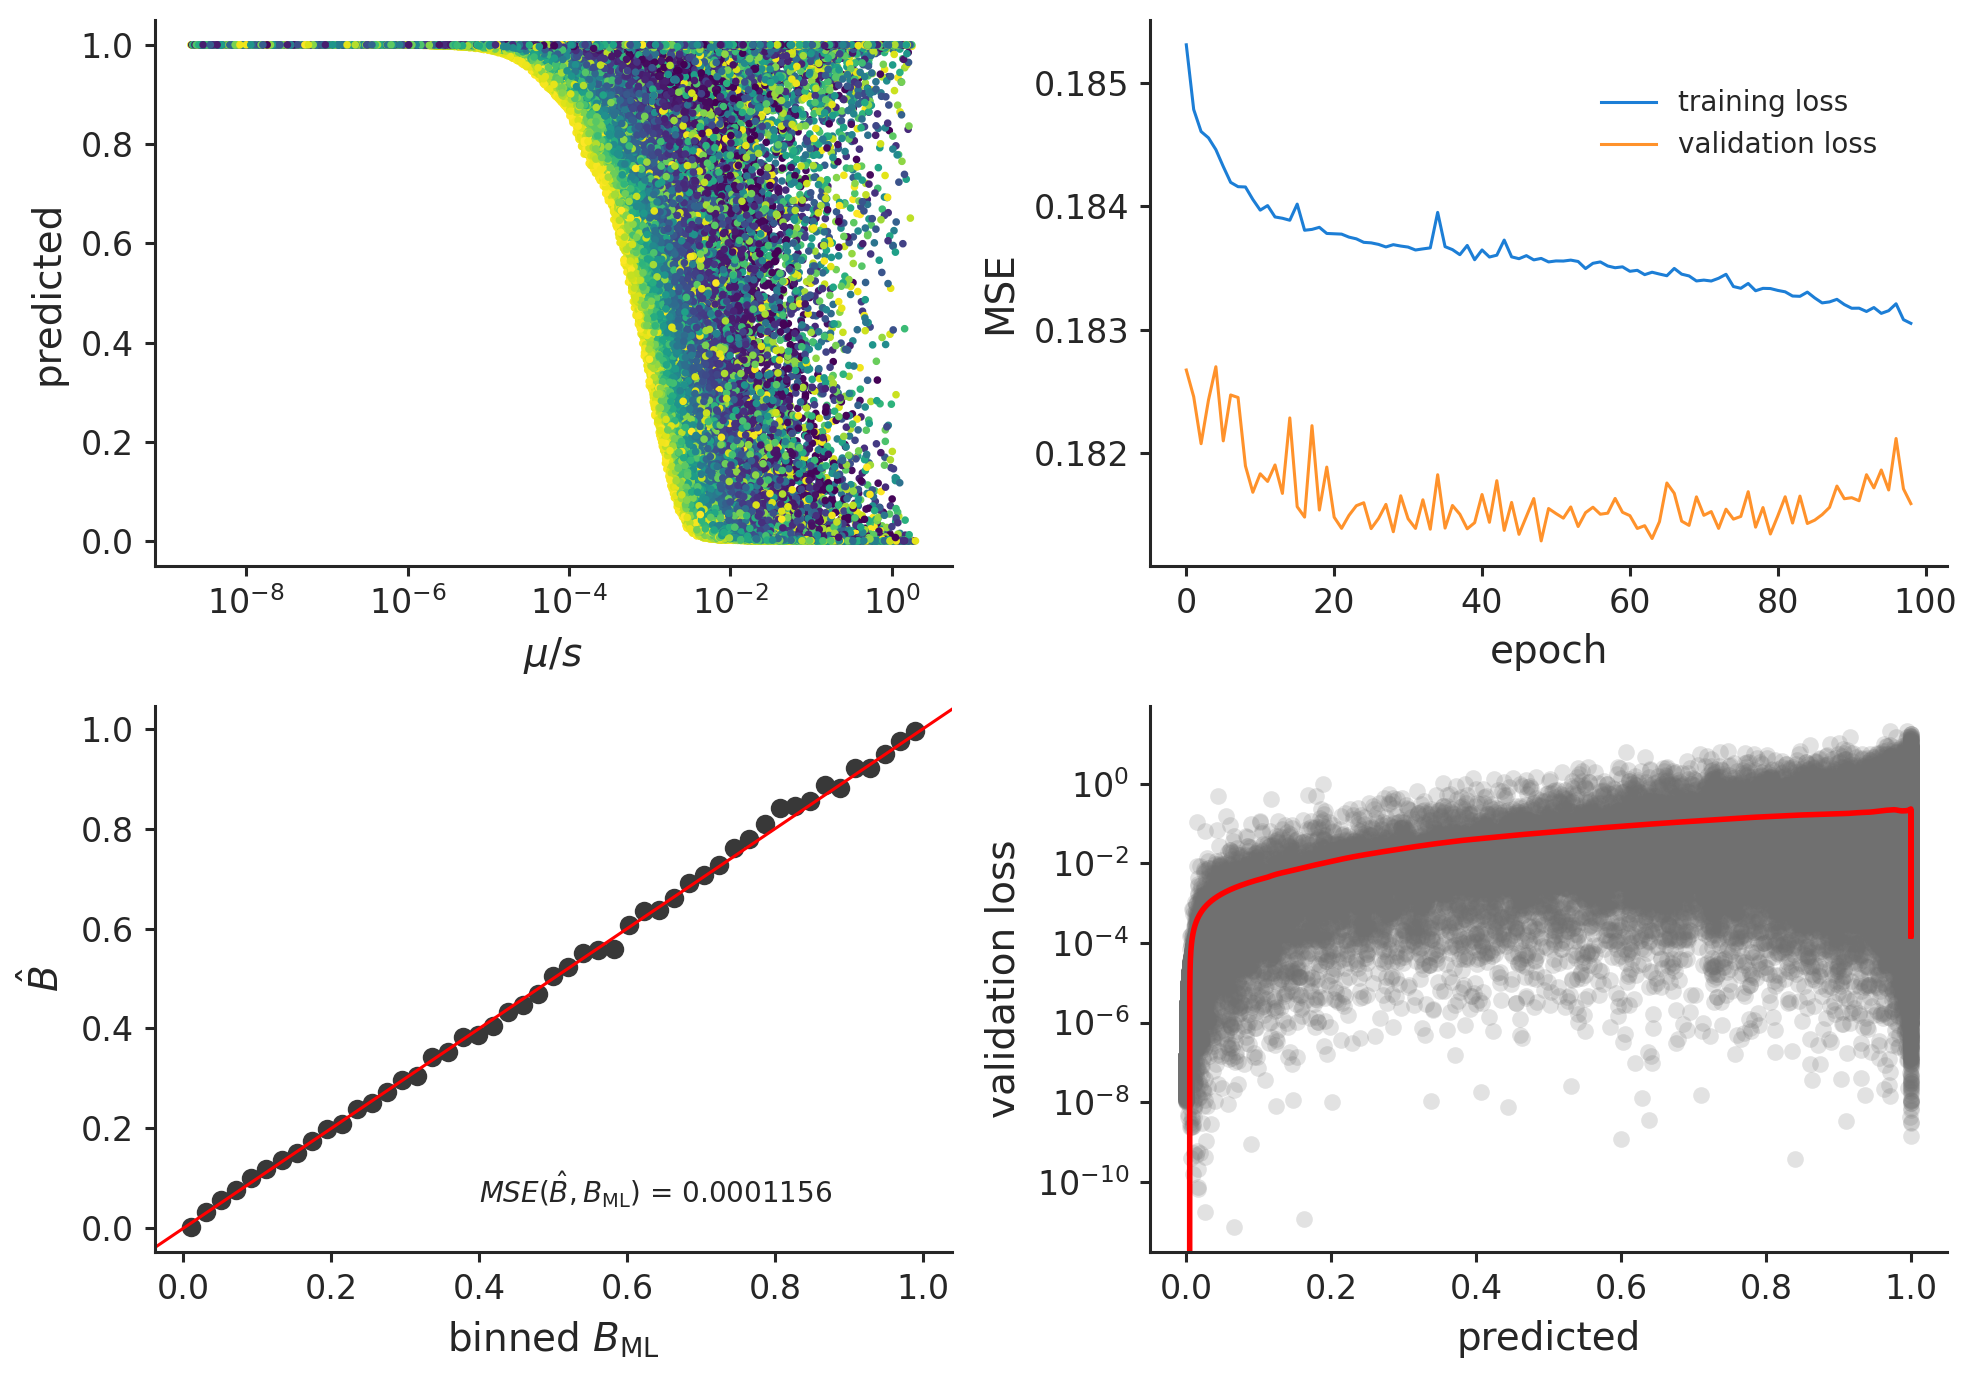

In [24]:
b_learn_diagnostic_plot(res['segment_best'][ARCH][0], n={'mu': 10, 'sh': 10, 'L':10, 'rbp':10, 'rf': 10}, c='L', add_theory=False)

Notice there is some wonkiness going on around $\mu/s \approx 10^{-4}$. Let's look at the other training run on the same data:

using cached predictions
using cached predictions
using cached predictions


/home/vsb/miniconda3/envs/bprime/lib/python3.8/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


(<Figure size 2000x1400 with 4 Axes>,
 ((<AxesSubplot:xlabel='$\\mu/s$', ylabel='predicted'>,
   <AxesSubplot:xlabel='epoch', ylabel='MSE'>),
  (<AxesSubplot:xlabel='binned $B_\\mathrm{ML}$', ylabel='$\\hat{B}$'>,
   <AxesSubplot:xlabel='predicted', ylabel='validation loss'>)))

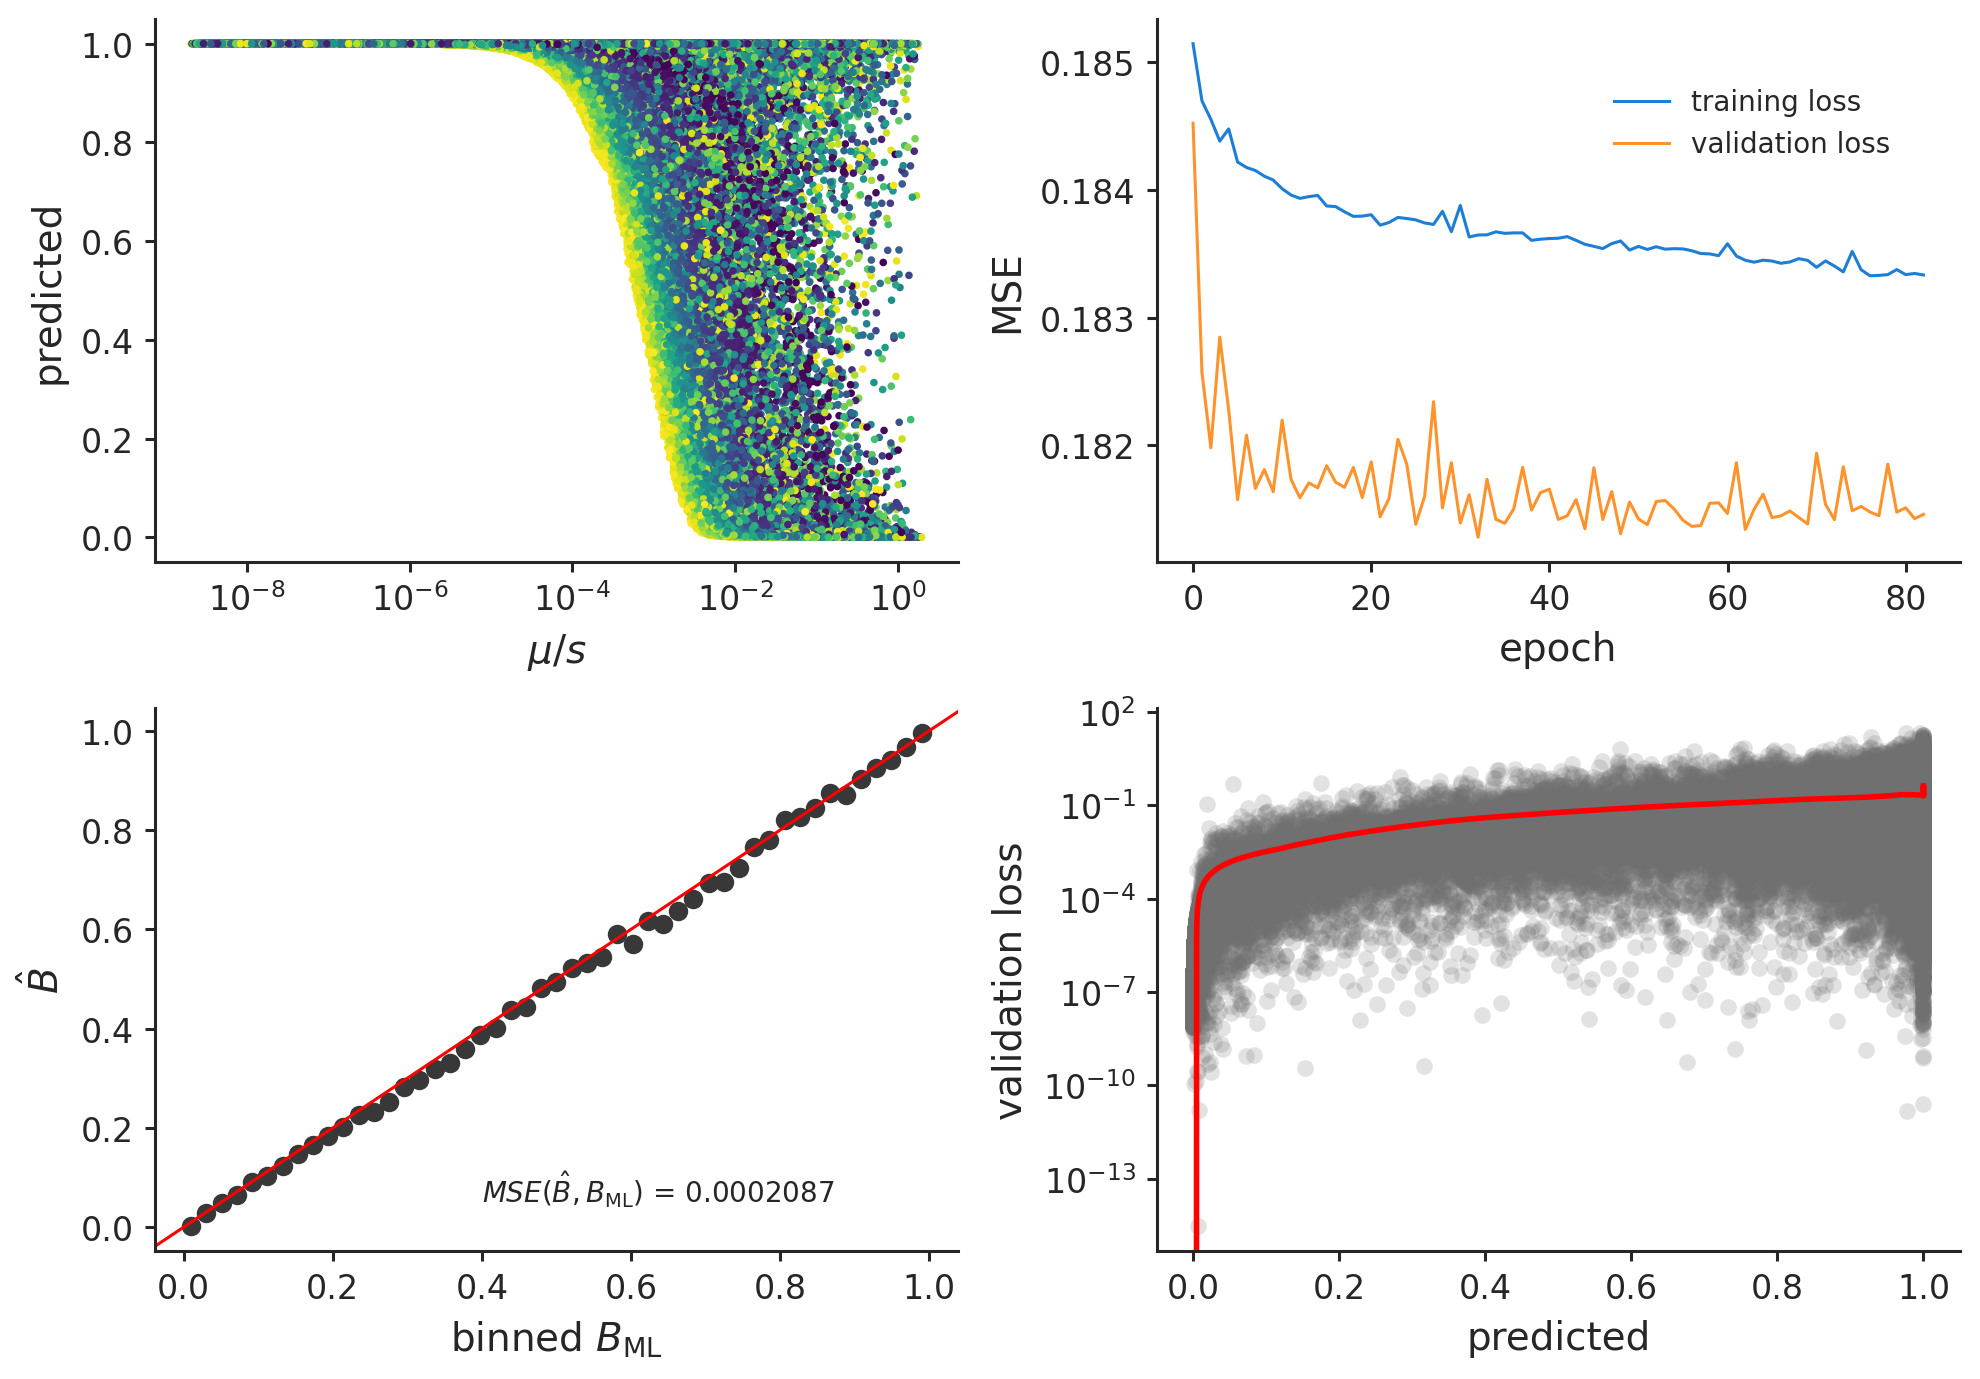

In [25]:
b_learn_diagnostic_plot(res['segment_best'][ARCH][1], n={'mu': 10, 'sh': 10, 'L':10, 'rbp':10, 'rf': 10}, c='L', add_theory=False)

It also appears here. What's the density of training data across the rate?

(<Figure size 1600x800 with 2 Axes>,
 array([<AxesSubplot:xlabel='$\\mu/s$', ylabel='density'>,
        <AxesSubplot:xlabel='$B_\\mathrm{theory}$', ylabel='density'>],
       dtype=object))

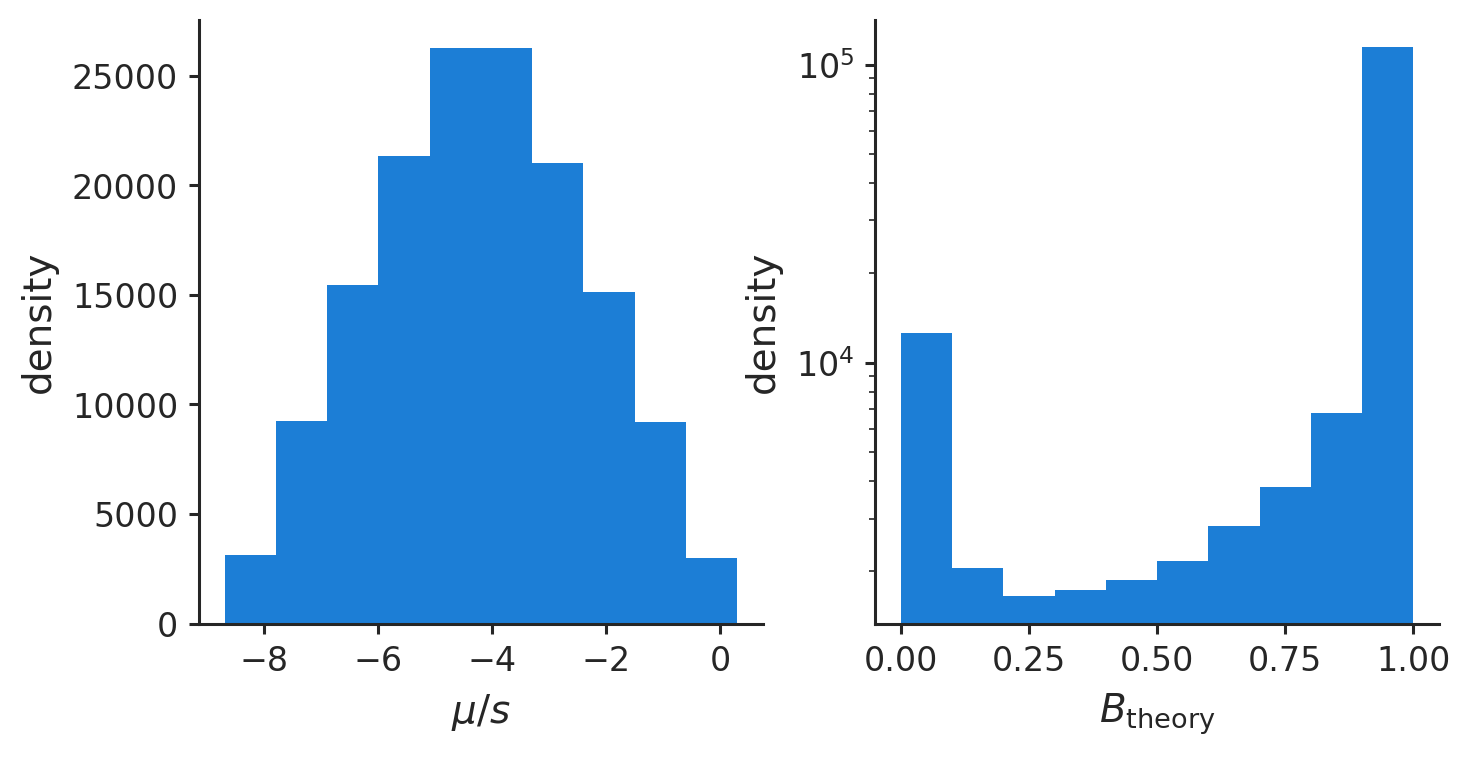

In [26]:
rate_density_plot(res['segment_best'][ARCH][0])

What if we increase the sample size to 1M?

using cached predictions
using cached predictions
using cached predictions
using cached predictions


(<Figure size 2000x1400 with 4 Axes>,
 ((<AxesSubplot:xlabel='$\\mu/s$', ylabel='predicted'>,
   <AxesSubplot:xlabel='epoch', ylabel='MSE'>),
  (<AxesSubplot:xlabel='binned $B_\\mathrm{ML}$', ylabel='$\\hat{B}$'>,
   <AxesSubplot:xlabel='predicted', ylabel='validation loss'>)))

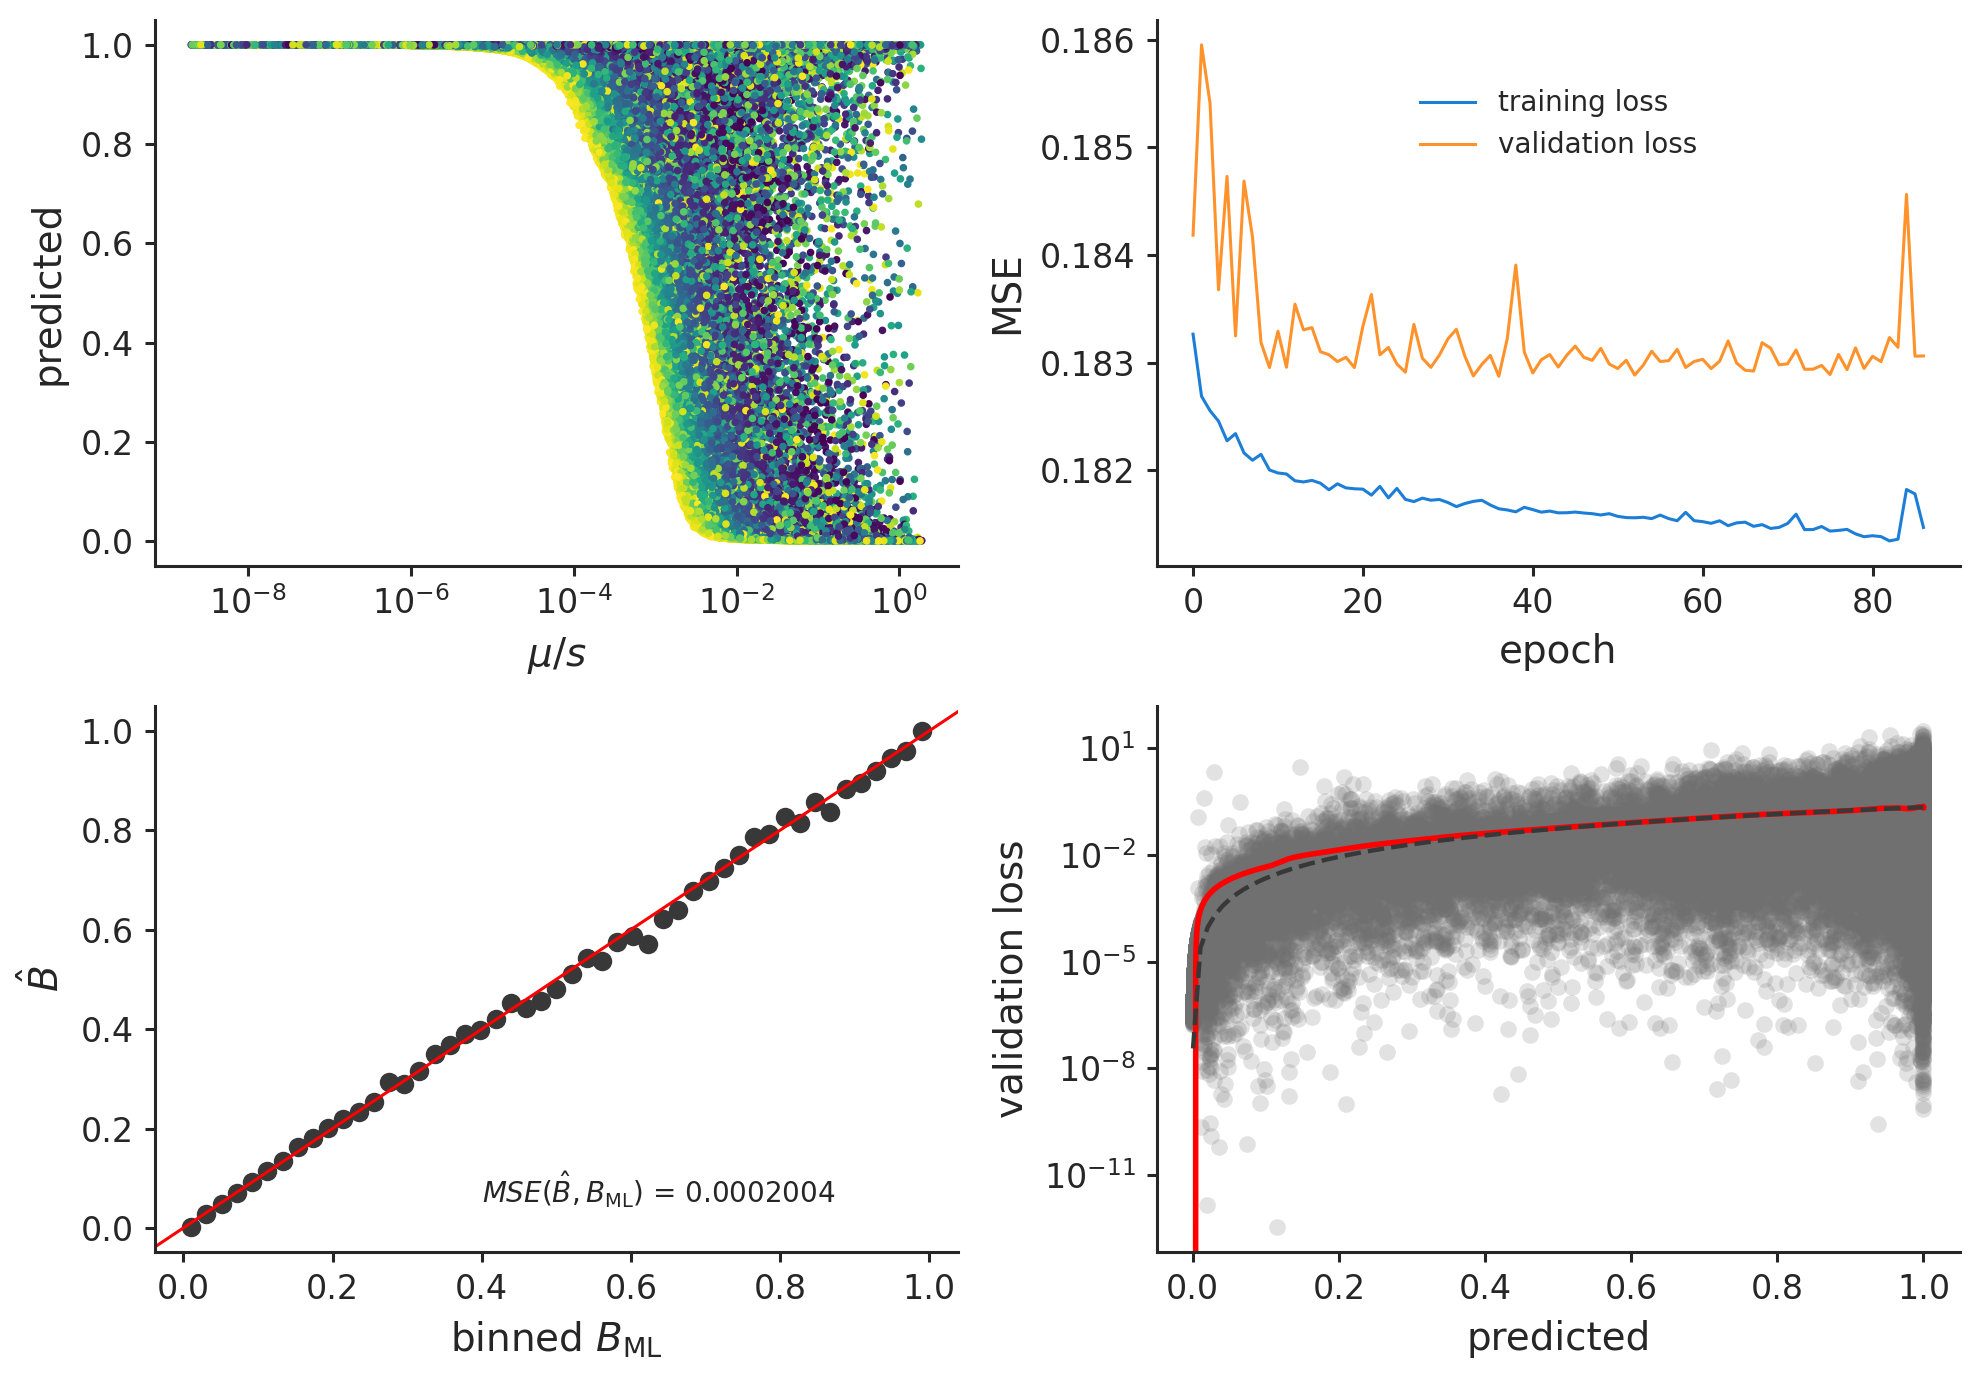

In [37]:
b_learn_diagnostic_plot(res['segment_best_largesample'][ARCH][1], n={'mu': 10, 'sh': 10, 'L':10, 'rbp':10, 'rf': 10}, c='L', add_theory=False)

using cached predictions
using cached predictions


(<Figure size 1600x800 with 1 Axes>,
 <AxesSubplot:xlabel='$B$', ylabel='binned BIAS between\ntheory/predicted'>)

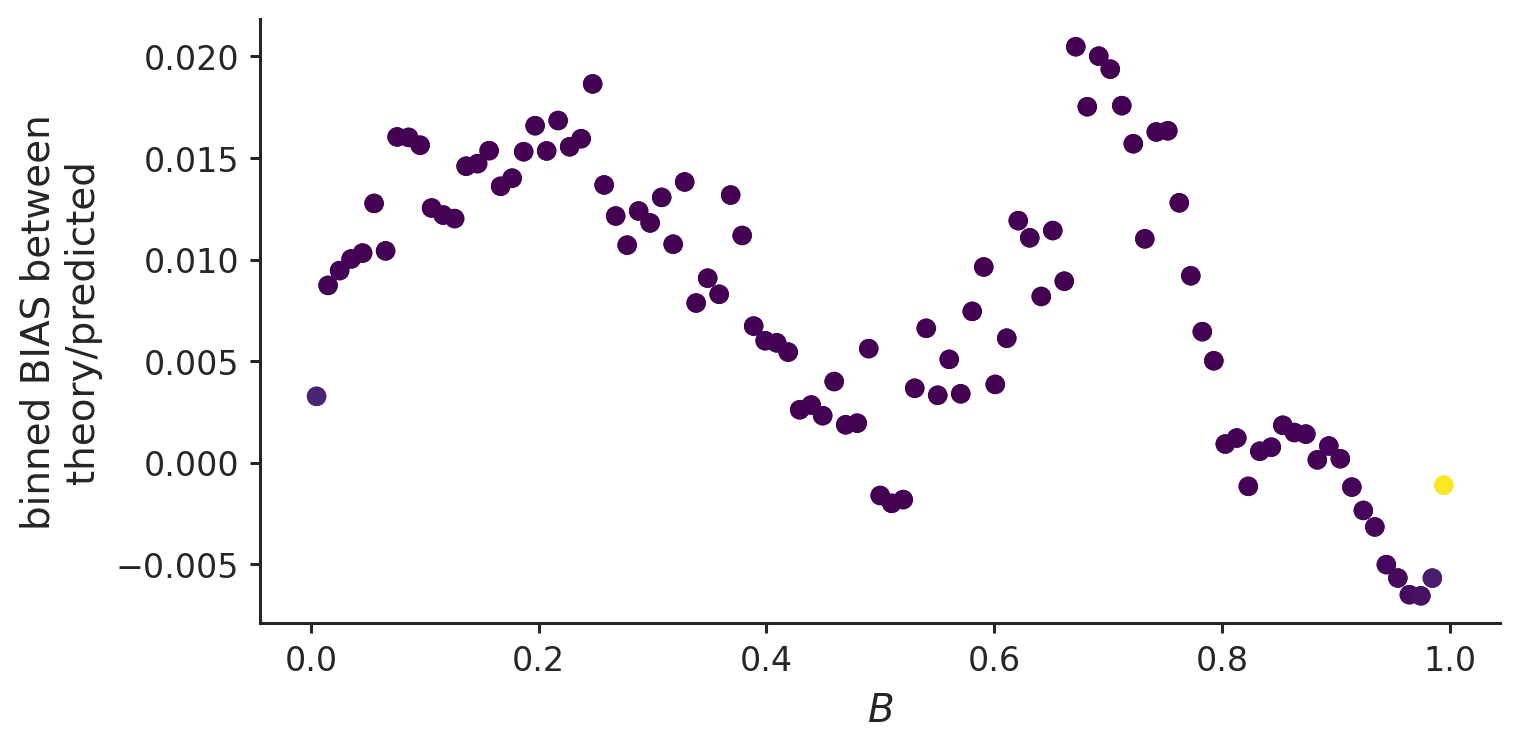

In [90]:
#figax = B_loss_plot(res['segment_best'][ARCH][0], 100)
figax = B_loss_plot(res['segment_best_largesample'][ARCH][0], bins=100, loss='bias')
B_loss_plot(res['segment_best_largesample'][ARCH][0], bins=100, loss='bias', figax=figax)

using cached predictions
using cached predictions


(<Figure size 1600x800 with 1 Axes>,
 <AxesSubplot:xlabel='sh', ylabel='binned MAE between\ntheory/predicted'>)

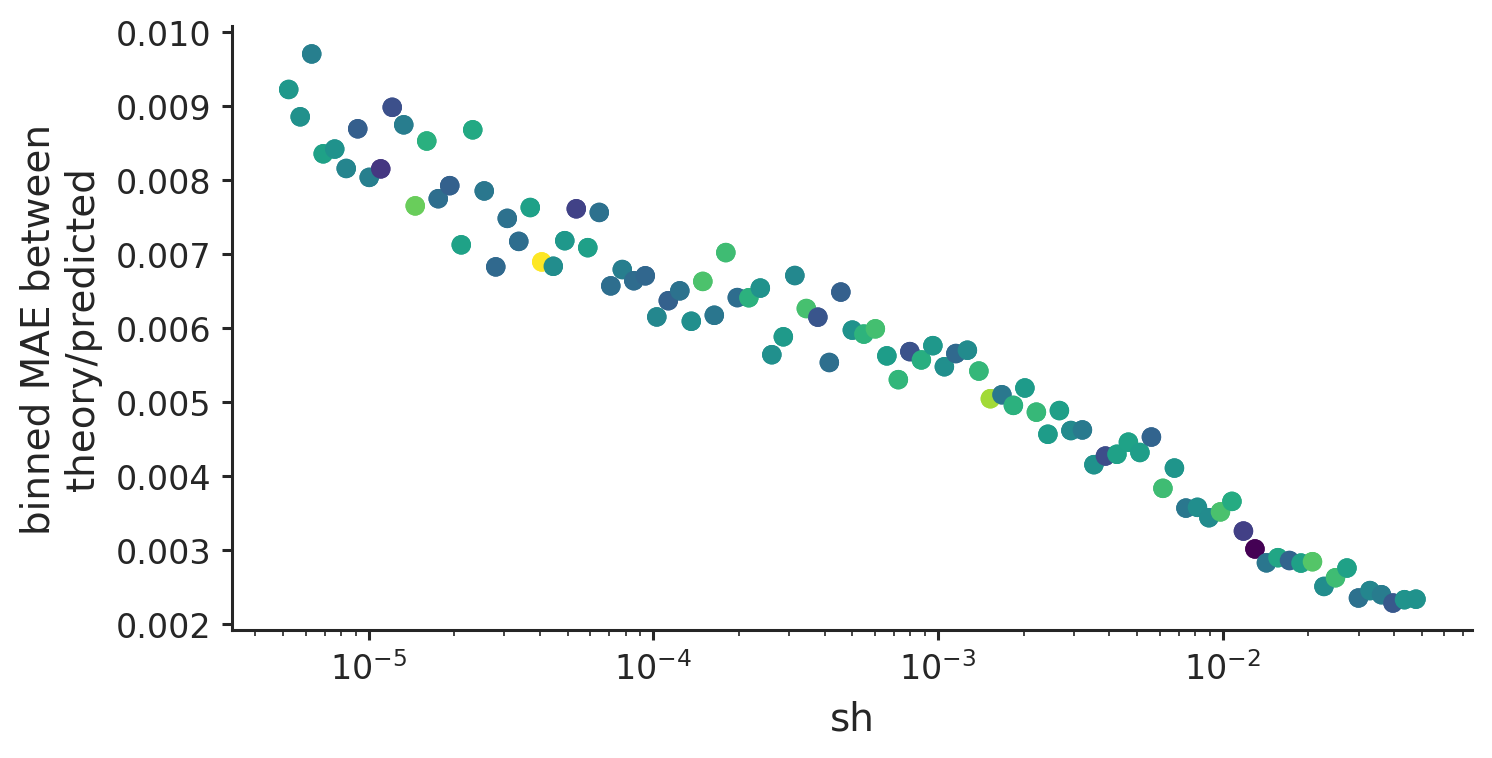

In [96]:
figax = feature_loss_plot(res['segment_best_largesample'][ARCH][0], 'sh', bins=100, loss='mae')
feature_loss_plot(res['segment_best_largesample'][ARCH][0], 'sh', bins=100, loss='mae', figax=figax)

using cached predictions
using cached predictions


(<Figure size 1600x800 with 1 Axes>,
 <AxesSubplot:xlabel='sh', ylabel='binned BIAS between\ntheory/predicted'>)

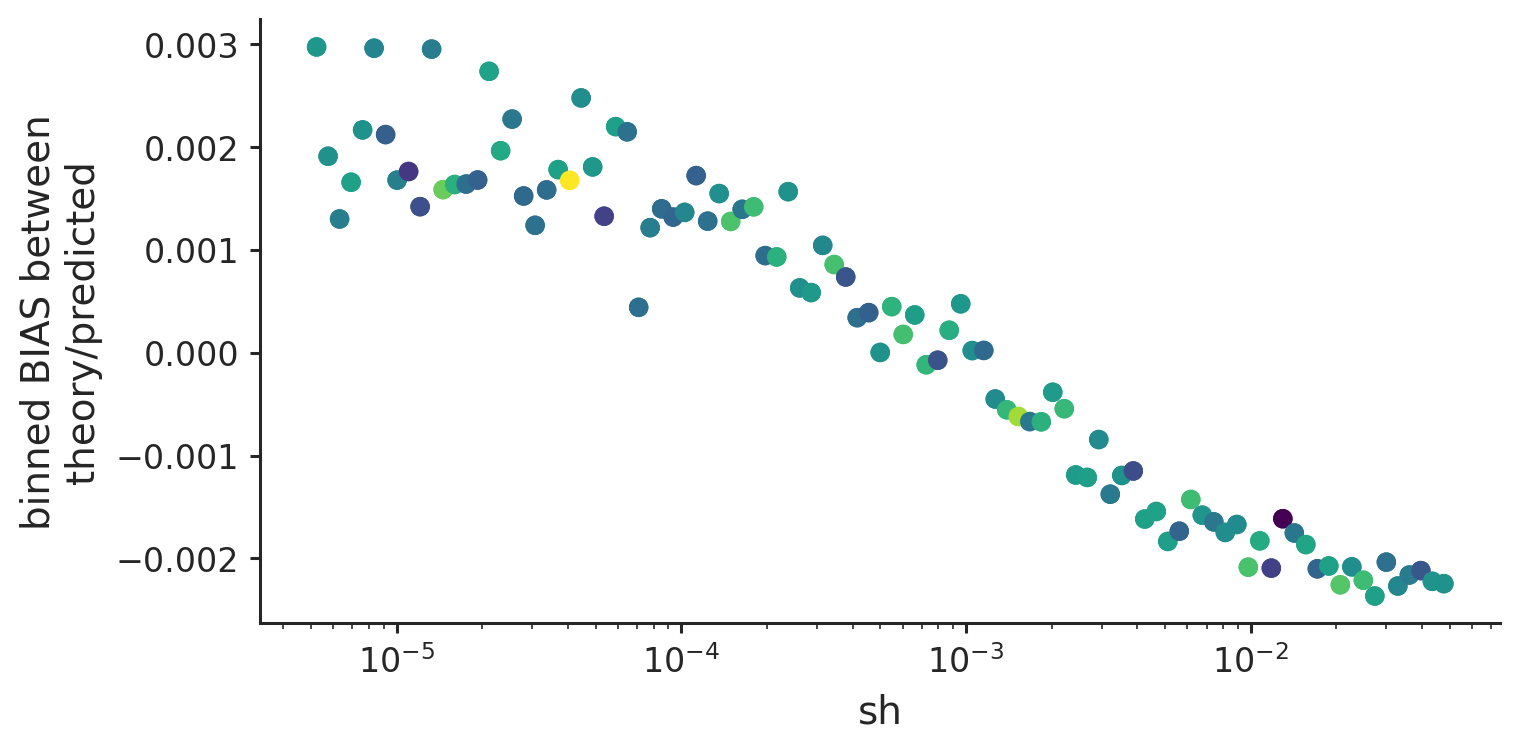

In [89]:
figax = feature_loss_plot(res['segment_best_largesample'][ARCH][0], 'sh', bins=100, loss='bias')
feature_loss_plot(res['segment_best_largesample'][ARCH][0], 'sh', bins=100, loss='bias', figax=figax)

using cached predictions
using cached predictions


(<Figure size 1600x800 with 1 Axes>,
 <AxesSubplot:xlabel='rbp', ylabel='binned BIAS between\ntheory/predicted'>)

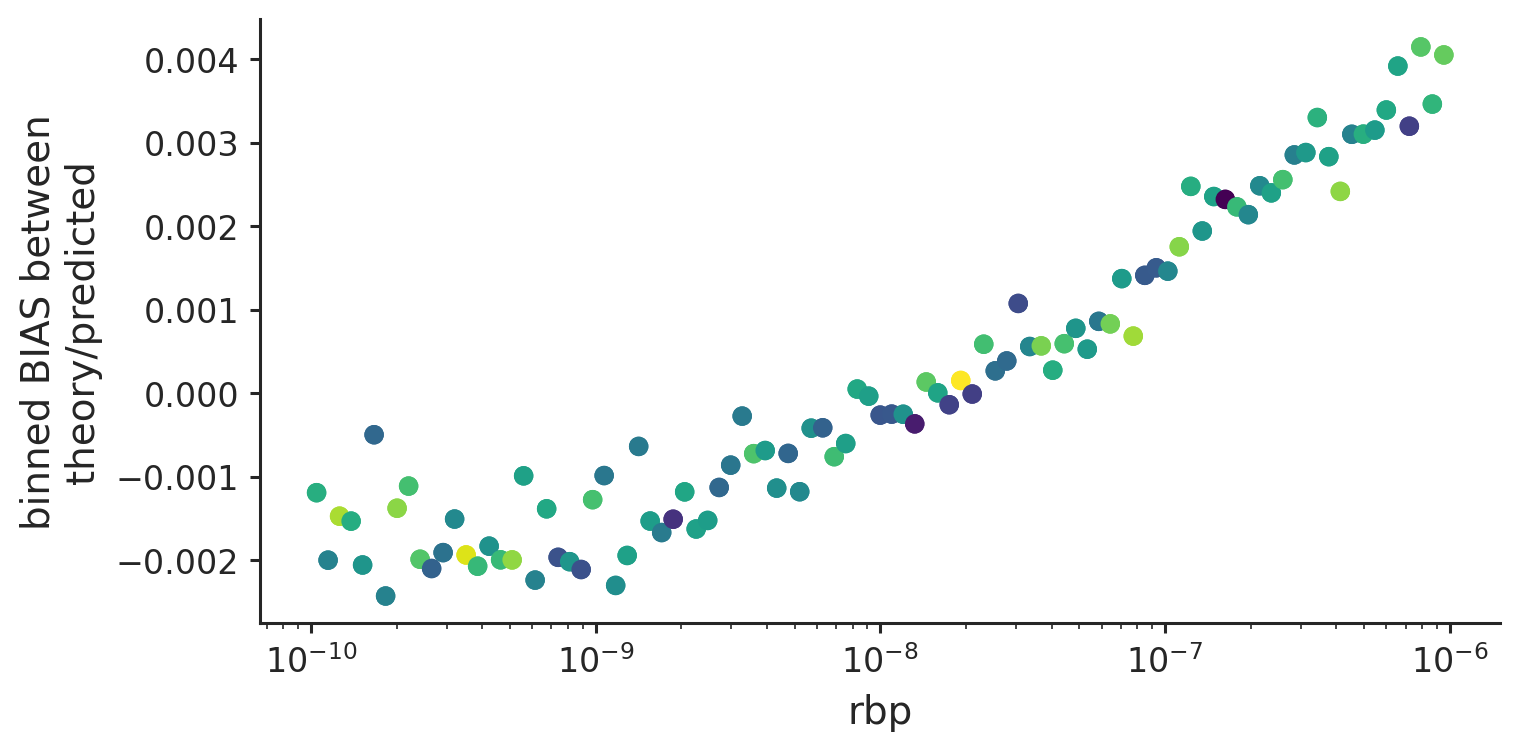

In [88]:
figax = feature_loss_plot(res['segment_best_largesample'][ARCH][0], 'rbp', bins=100, loss='bias')
feature_loss_plot(res['segment_best_largesample'][ARCH][0], 'rbp', bins=100, loss='bias', figax=figax)

using cached predictions
using cached predictions


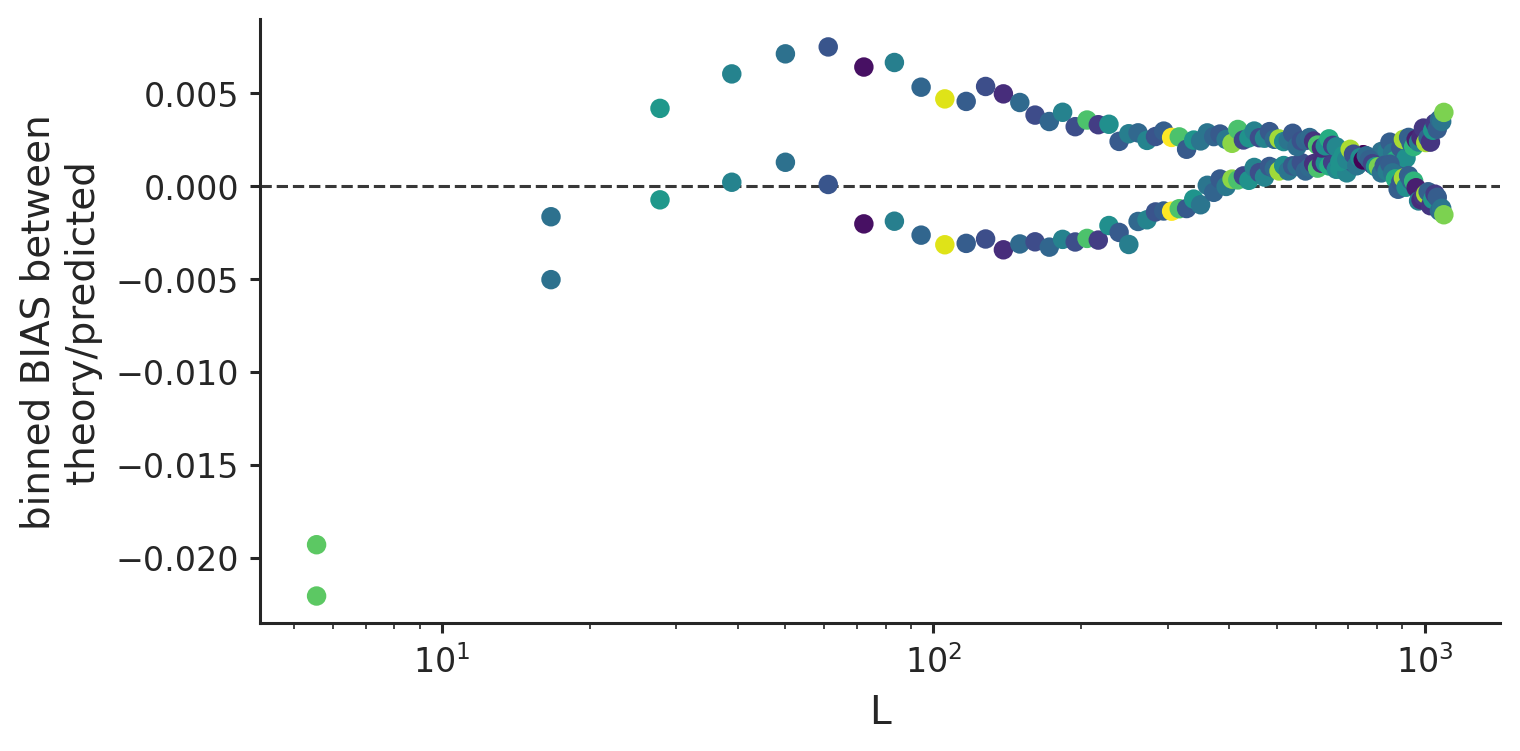

In [87]:
#figax = B_loss_plot(res['segment_best'][ARCH][0], 100)
figax = feature_loss_plot(res['segment_best_largesample'][ARCH][0], 'L', bins=100, log10=False, loss='bias')
fig, ax = feature_loss_plot(res['segment_best_largesample'][ARCH][1], 'L', bins=100, log10=False, loss='bias', figax=figax)
ax.axhline(0, c='0.22', linestyle='dashed', zorder=-1)

using cached predictions
using cached predictions


(<Figure size 1600x800 with 1 Axes>,
 <AxesSubplot:xlabel='$\\mu/s$', ylabel='binned MAE between\ntheory/predicted'>)

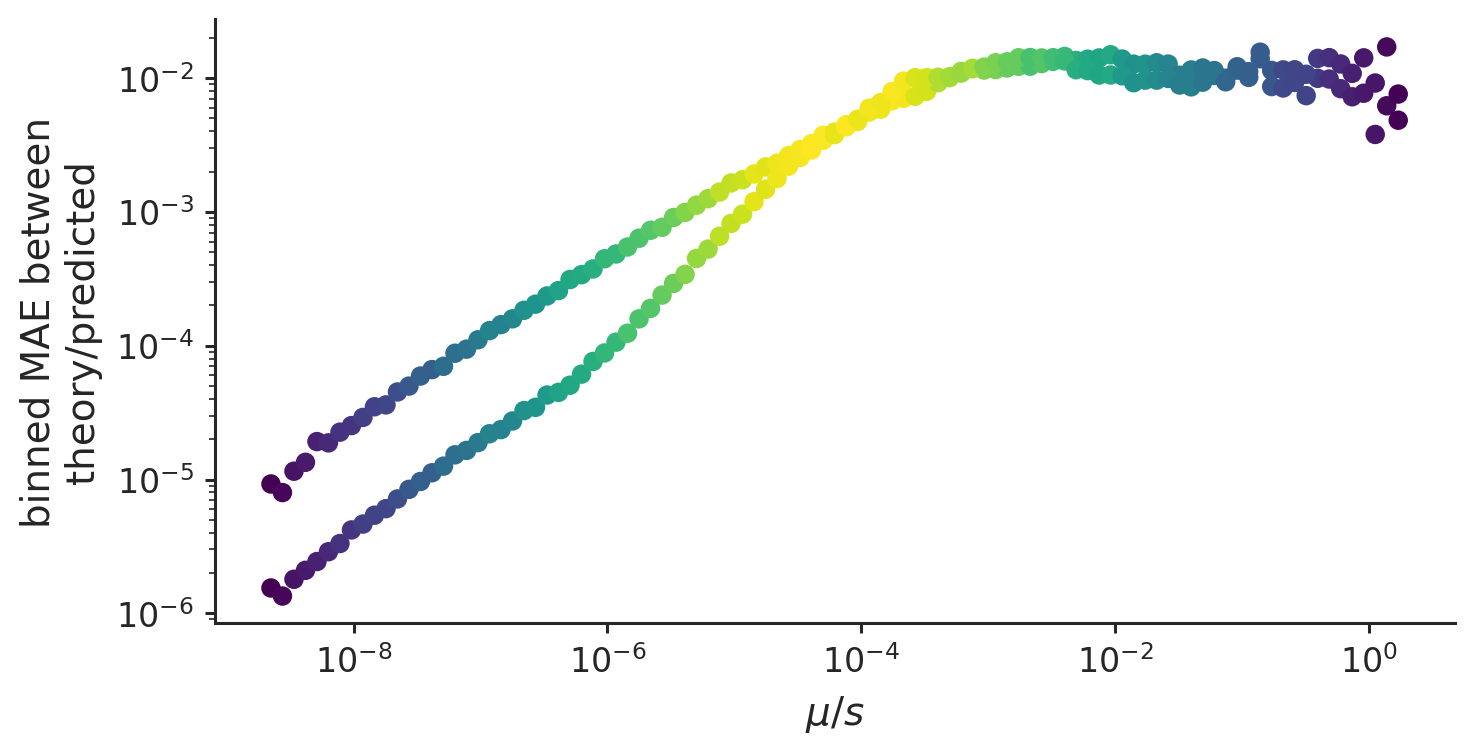

In [92]:
figax = rate_loss_plot(res['segment_best_largesample'][ARCH][0], bins=100, loss='mae')
rate_loss_plot(res['segment_best_largesample'][ARCH][1], bins=100, loss='mae', figax=figax)

using cached predictions
using cached predictions


(<Figure size 1600x800 with 1 Axes>,
 <AxesSubplot:xlabel='$\\mu/s$', ylabel='binned BIAS between\ntheory/predicted'>)

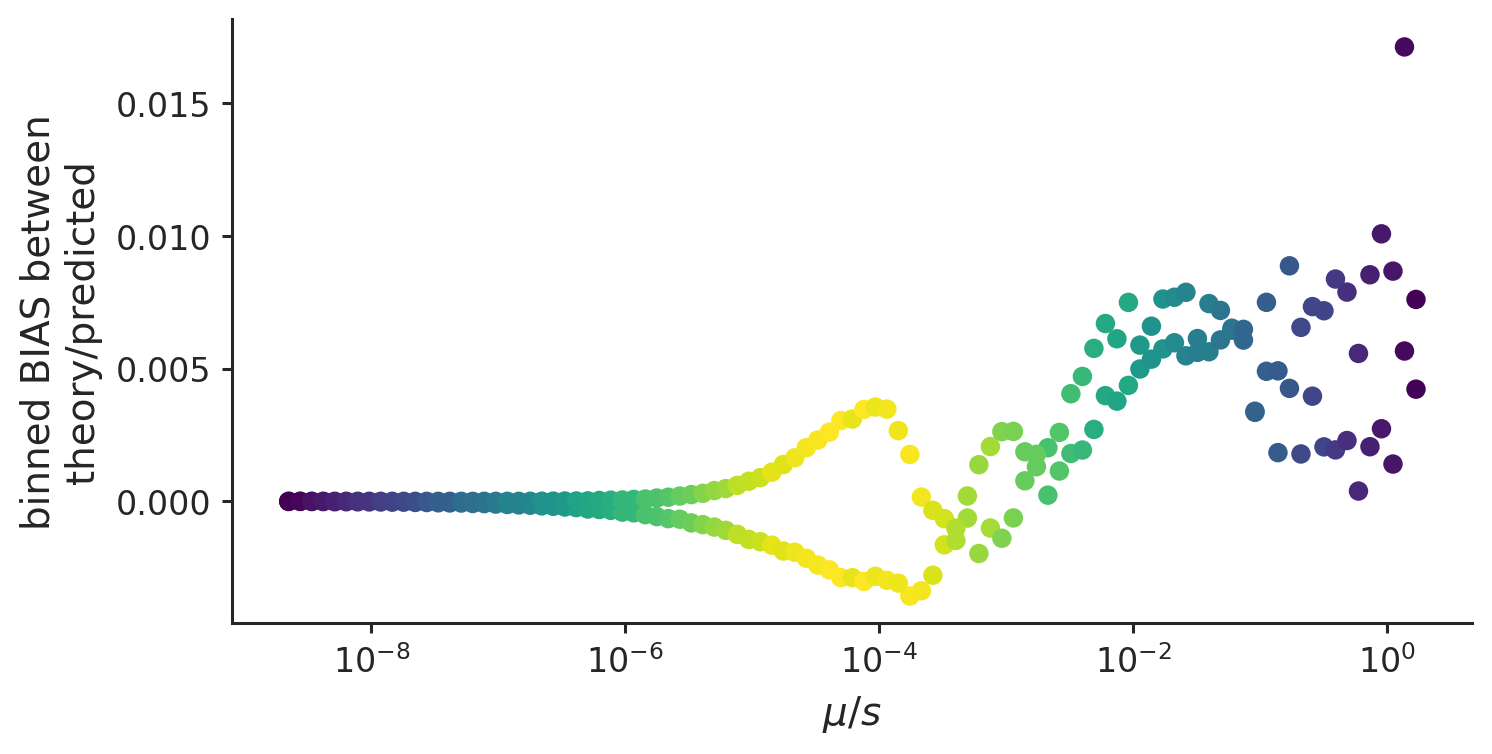

In [84]:
figax = rate_loss_plot(res['segment_best_largesample'][ARCH][0], bins=100, logy=False, loss='bias')
rate_loss_plot(res['segment_best_largesample'][ARCH][1], bins=100, logy=False, loss='bias', figax=figax)

In [ ]:
x, y = res['simple'][ARCH][0].theory_B(), res['simple'][ARCH][0].predict_test()
plt.scatter(x, y, alpha=0.1)

using cached predictions


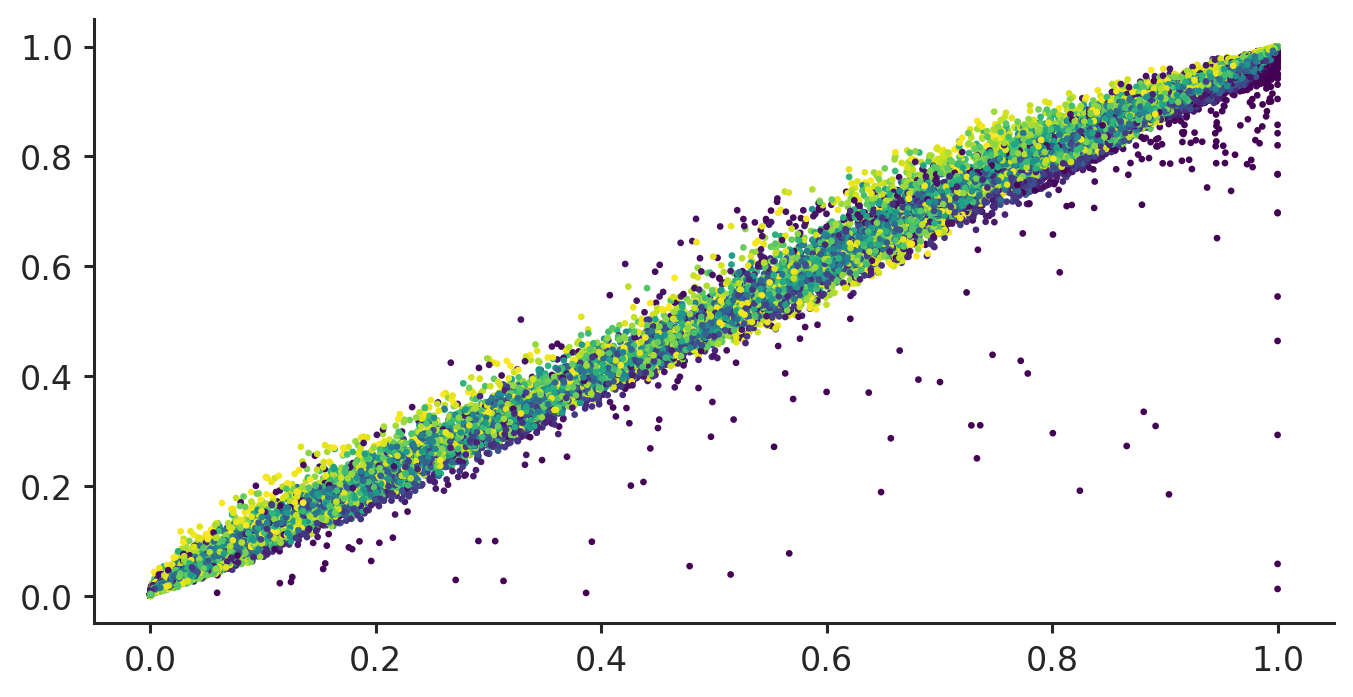

In [106]:
x, y = res['segment_best_largesample'][ARCH][0].theory_B(), res['segment_best_largesample'][ARCH][0].predict_test()
plt.scatter(x, y, c=res['segment_best_largesample'][ARCH][0].func.X_test_orig_linear[:, 4], alpha=1, s=2)

In [133]:
b = res['segment_best_largesample'][ARCH][0].theory_B()
bias = res['segment_best_largesample'][ARCH][0].predict_test() - b

using cached predictions


(-0.1, 0.1)

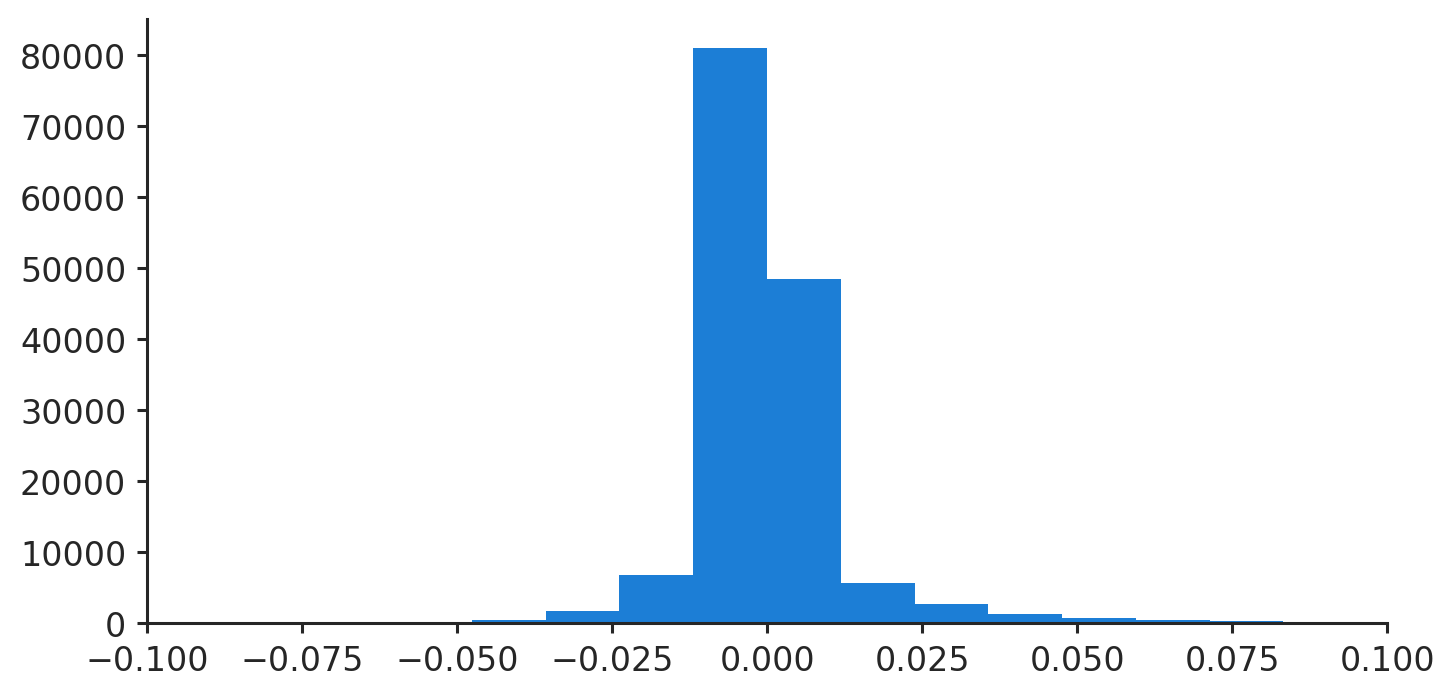

In [130]:
fig, ax = plt.subplots()
_ = ax.hist(bias, 100)
ax.set_xlim(-0.1, 0.1)

In [138]:
n = 100
idx = np.random.randint(0, len(b), n)
error =  n*np.mean(bias[idx])/b[idx]
real = 10**sum(np.log10(b[idx]))
real/10**error

/tmp/ipykernel_6210/1482361838.py:5: RuntimeWarning: overflow encountered in power
  real/10**error


array([1.34801598e-097, 1.34792851e-097, 1.08449537e-097, 7.28778863e-104,
       1.34745282e-097, 7.40253891e-099, 1.34674225e-097, 1.34720077e-097,
       1.24256898e-097, 1.34792653e-097, 1.34787721e-097, 1.28604343e-097,
       1.34304103e-097, 8.16425592e-098, 1.34778604e-097, 2.86051686e-098,
       1.33598489e-097, 1.31344042e-097, 1.04644196e-097, 1.34800884e-097,
       1.34795414e-097, 1.34796541e-097, 1.34700562e-097, 1.34791927e-097,
       1.34790351e-097, 1.34801629e-097, 1.34565406e-097, 1.08443630e-097,
       1.34778970e-097, 1.34799165e-097, 1.34801643e-097, 1.34800850e-097,
       1.33592458e-097, 1.34801572e-097, 1.28759826e-097, 1.34145739e-097,
       1.32138545e-097, 4.47592792e-098, 1.33976936e-097, 1.34801008e-097,
       1.21279482e-097, 1.34801458e-097, 1.34431850e-097, 1.34801229e-097,
       1.34801641e-097, 1.34778895e-097, 1.34734941e-097, 0.00000000e+000,
       1.34758807e-097, 1.27471406e-097, 0.00000000e+000, 1.34787594e-097,
       1.34791522e-097, 1

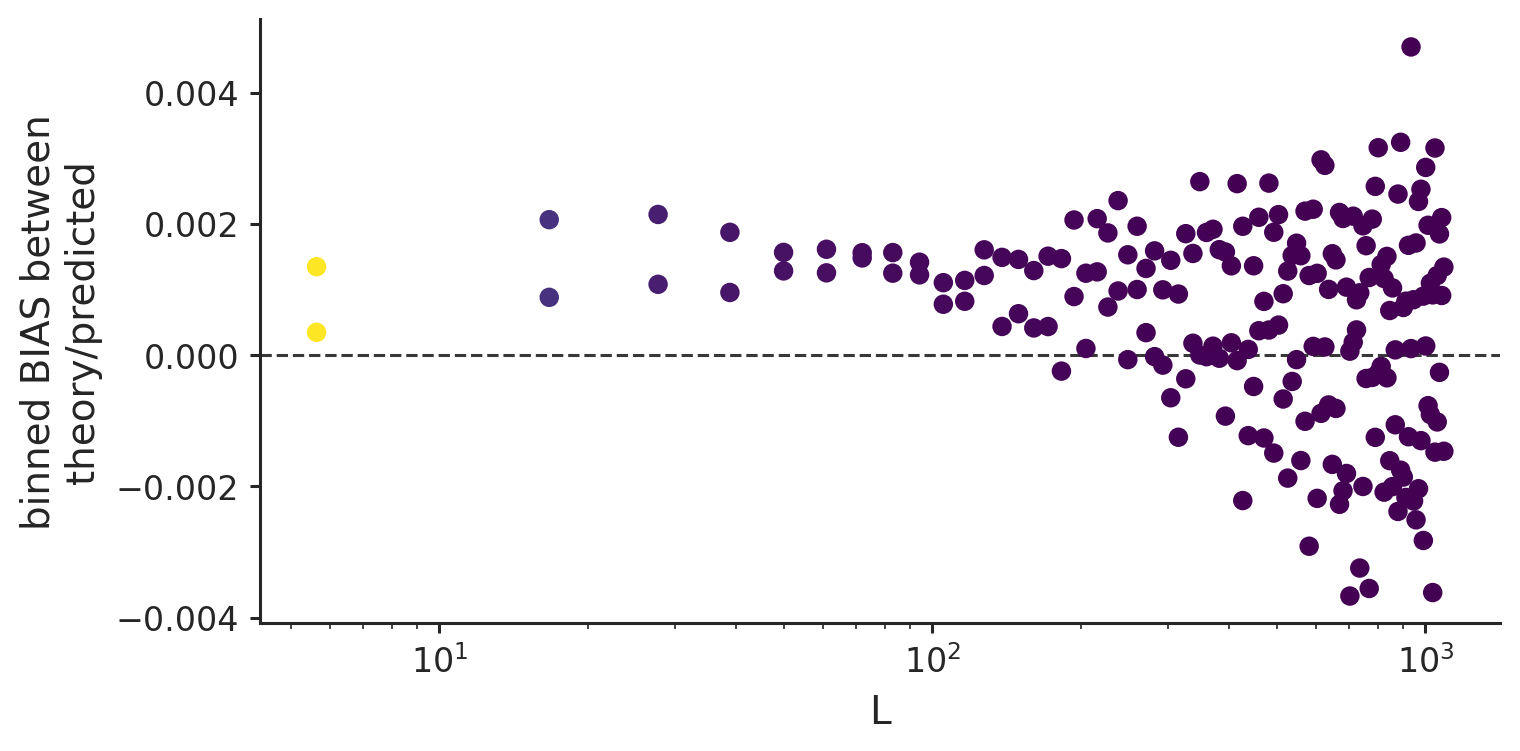

In [141]:



#figax = B_loss_plot(res['segment_best'][ARCH][0], 100)
figax = feature_loss_plot(res['segment_best_largesample_logL'][ARCH][0], 'L', bins=100, log10=False, loss='bias')
fig, ax = feature_loss_plot(res['segment_best_largesample_logL'][ARCH][1], 'L', bins=100, log10=False, loss='bias', figax=figax)
ax.axhline(0, c='0.22', linestyle='dashed', zorder=-1)

In [143]:
res['segment_best_largesample_logL'][ARCH][0].func.features

{'sh': 0, 'L': 1, 'rf': 2, 'mu': 3, 'rbp': 4}

using cached predictions


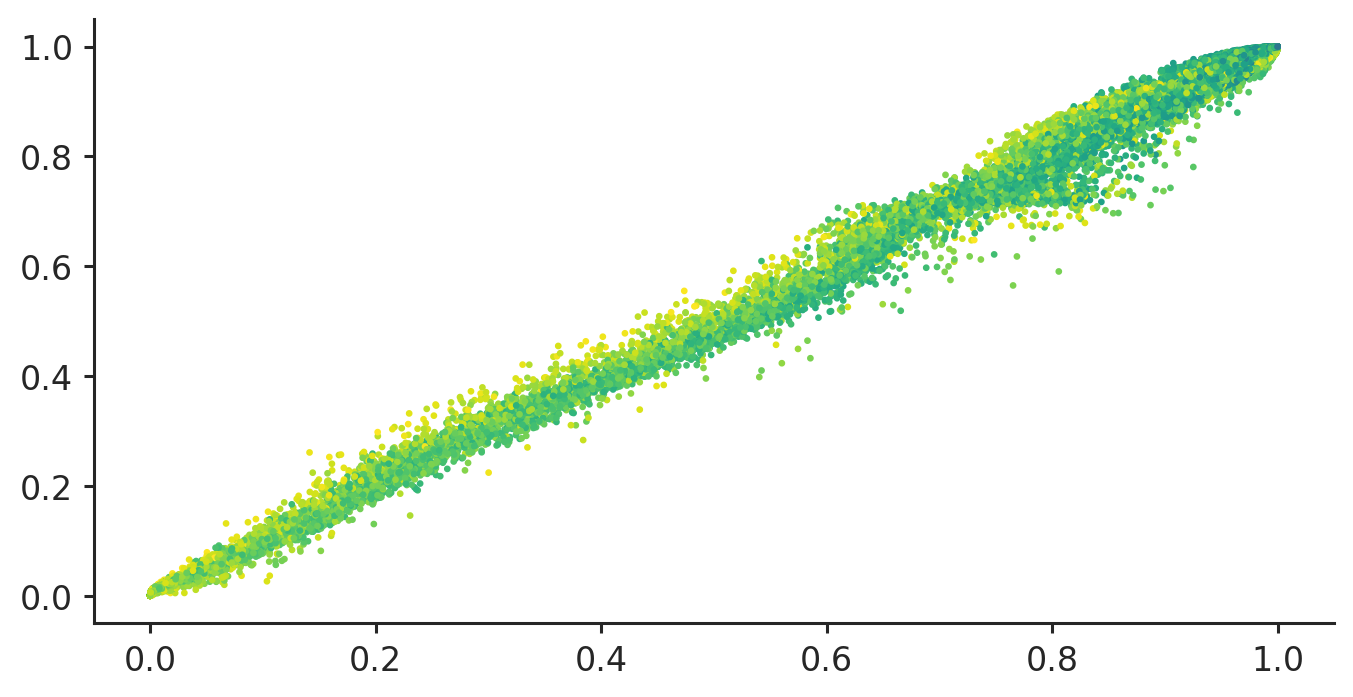

In [150]:
x, y = res['segment_best_largesample_logL'][ARCH][0].theory_B(), res['segment_best_largesample_logL'][ARCH][0].predict_test()
col = res['segment_best_largesample_logL'][ARCH][0].func.X_test_orig_linear[:, 3] * res['segment_best_largesample_logL'][ARCH][0].func.X_test_orig_linear[:, 1]
col = res['segment_best_largesample_logL'][ARCH][0].func.X_test_orig_linear[:, 3] / res['segment_best_largesample_logL'][ARCH][0].func.X_test_orig_linear[:, 0]

plt.scatter(x, y, c=np.log10(col), alpha=1, s=2)

using cached predictions
using cached predictions


(<Figure size 1600x800 with 1 Axes>,
 <AxesSubplot:xlabel='$\\mu/s$', ylabel='binned MAE between\ntheory/predicted'>)

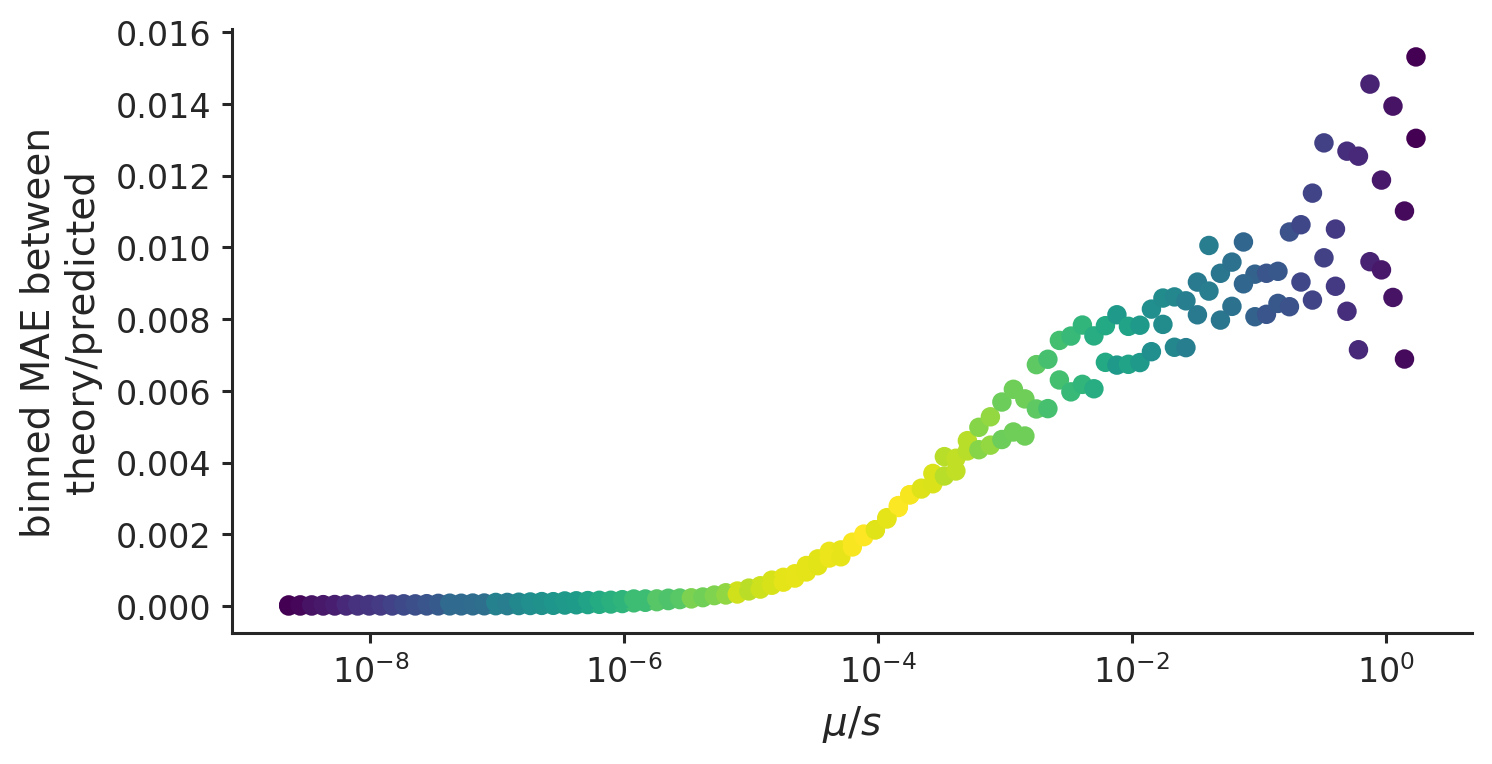

In [152]:
figax = rate_loss_plot(res['segment_best_largesample_logL'][ARCH][0], bins=100, logy=False, loss='mae')
rate_loss_plot(res['segment_best_largesample_logL'][ARCH][1], bins=100, logy=False, loss='mae', figax=figax)

using cached predictions
using cached predictions


(<Figure size 1600x800 with 1 Axes>,
 <AxesSubplot:xlabel='$B$', ylabel='binned BIAS between\ntheory/predicted'>)

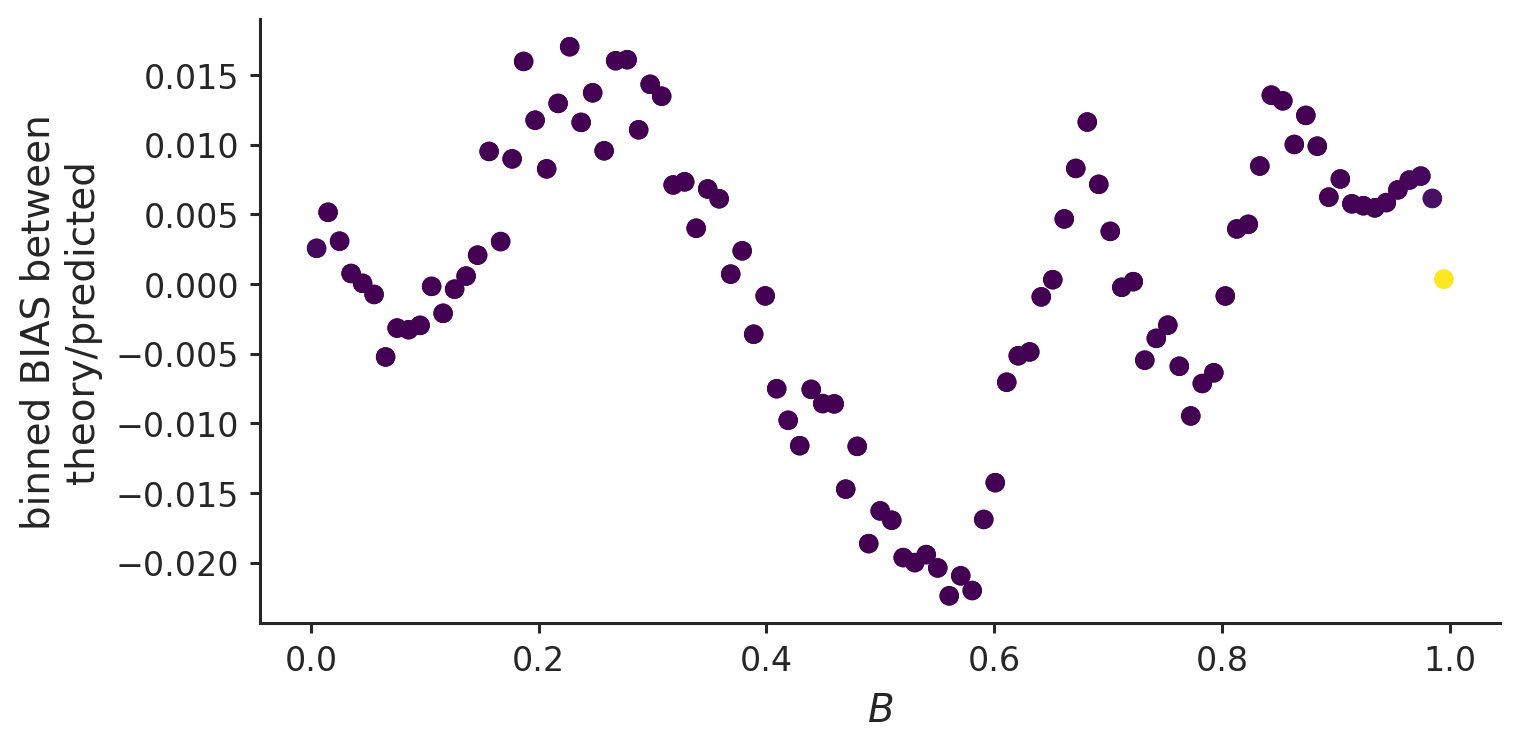

In [153]:
#figax = B_loss_plot(res['segment_best'][ARCH][0], 100)
figax = B_loss_plot(res['segment_best_largesample_logL'][ARCH][0], bins=100, loss='bias')
B_loss_plot(res['segment_best_largesample_logL'][ARCH][0], bins=100, loss='bias', figax=figax)

In [156]:
np.meshgrid(np.arange(3), np.arange(2))

[array([[0, 1, 2],
        [0, 1, 2]]),
 array([[0, 0, 0],
        [1, 1, 1]])]

using cached predictions
using cached predictions
using cached predictions
using cached predictions
using cached predictions
using cached predictions
using cached predictions


(<Figure size 1400x2000 with 8 Axes>,
 <AxesSubplot:xlabel='rbp', ylabel='binned MAE'>)

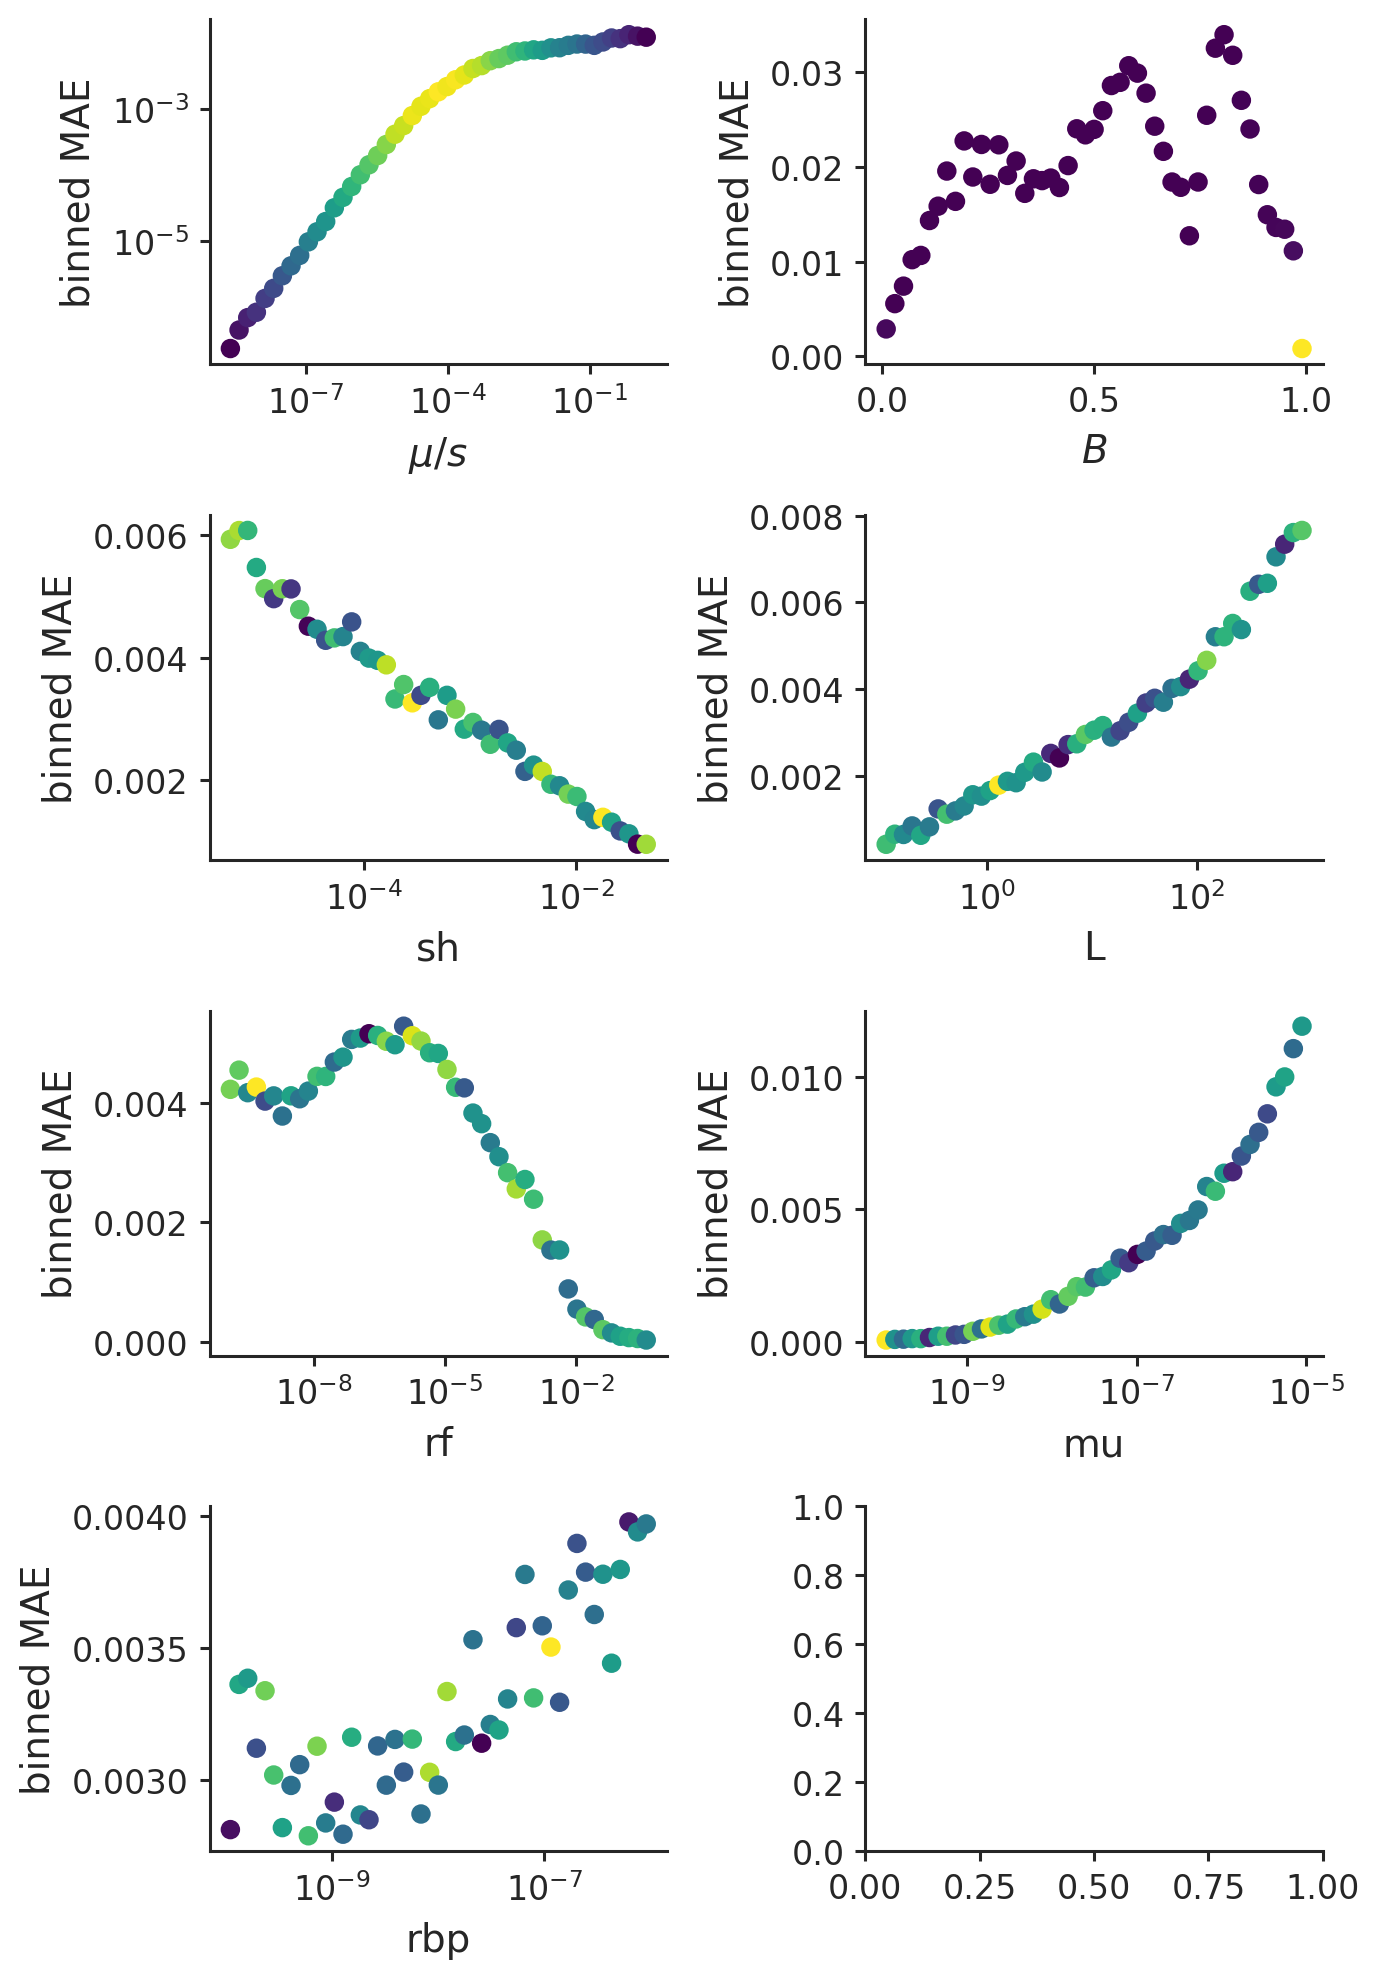

In [183]:
feature_loss_plots(res['segment_best_largesample_logL'][ARCH][0], 50)

using cached predictions
using cached predictions
using cached predictions
using cached predictions
using cached predictions
using cached predictions
using cached predictions
using cached predictions
using cached predictions
using cached predictions
using cached predictions
using cached predictions
using cached predictions
using cached predictions
using cached predictions
using cached predictions
using cached predictions
using cached predictions
using cached predictions
using cached predictions
using cached predictions
using cached predictions
using cached predictions
using cached predictions
using cached predictions
using cached predictions
using cached predictions
using cached predictions


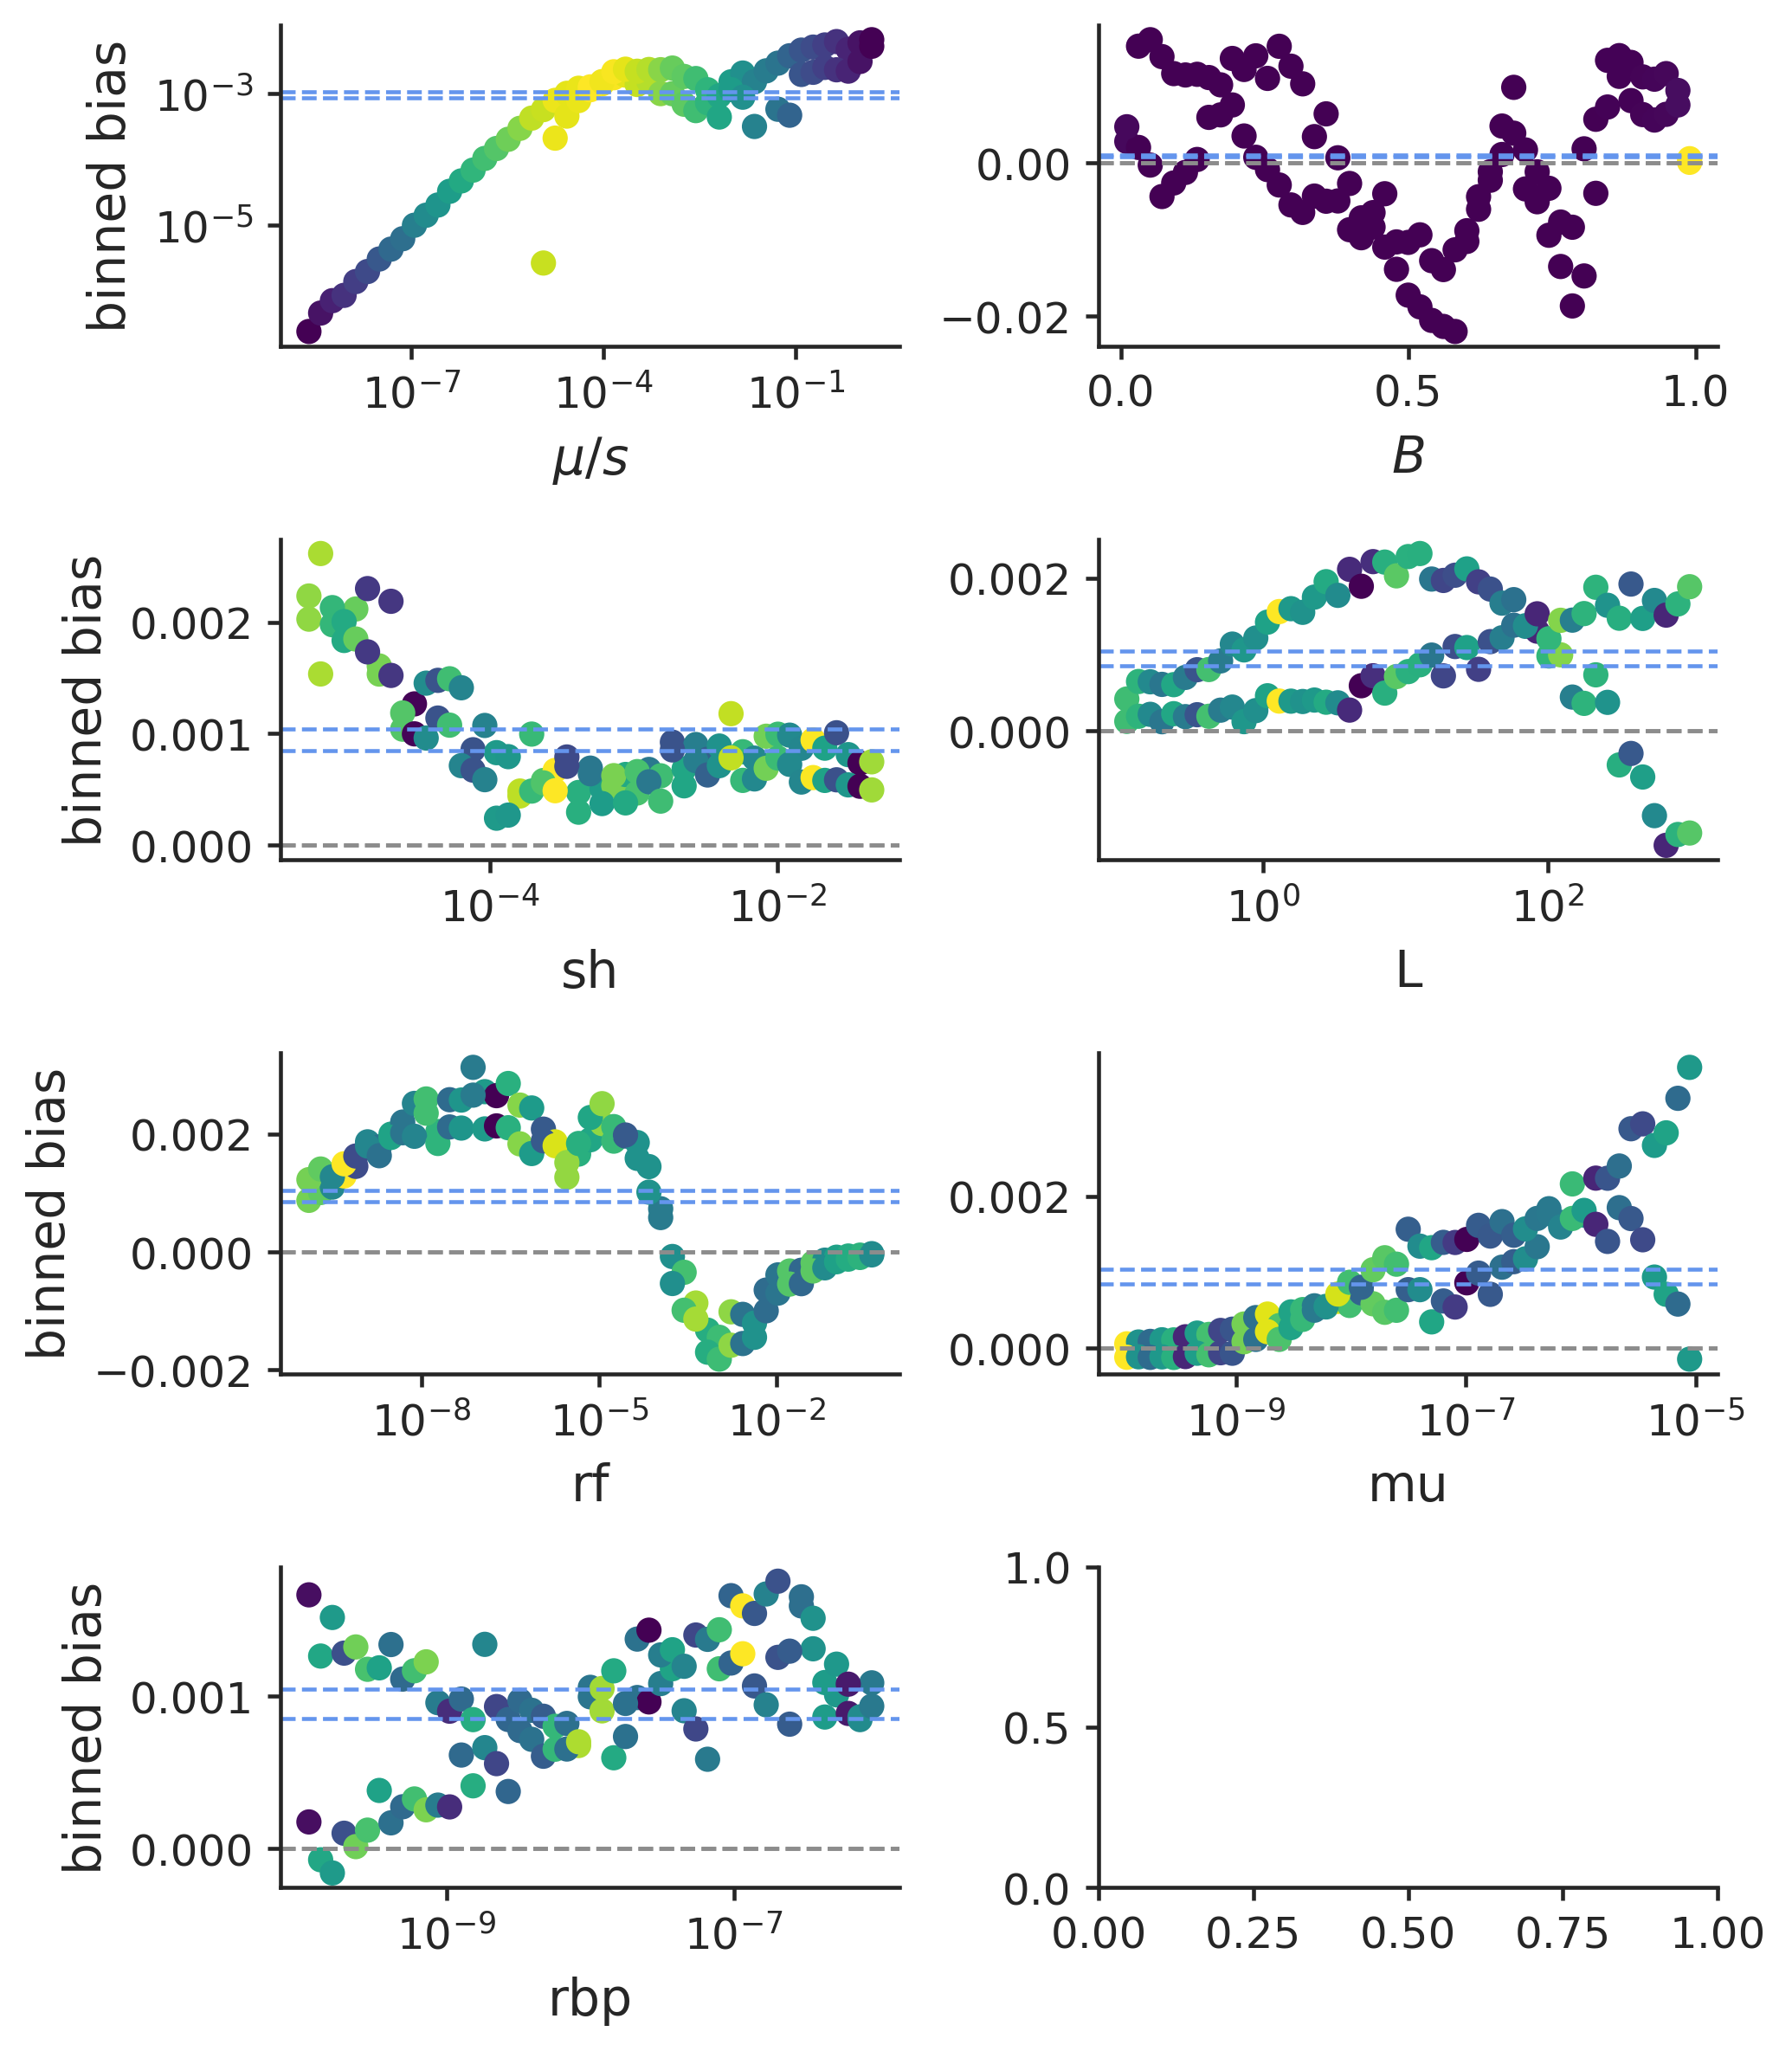

In [207]:
figax = feature_loss_plots(res['segment_best_largesample_logL'][ARCH][0], 50, loss='bias')
_ = feature_loss_plots(res['segment_best_largesample_logL'][ARCH][1], 50, loss='bias', figax=figax)

In [209]:
fig, ax = _

In [210]:
fig.savefig('/home/vsb/bias_plot.pdf')